# Flight Passenger Analysis

#### Aim
There is a lot of flights going to and fro now-a-days. As a data analyst you have been hired to assist companies, increasing their sales and business.
You have been shared with customer satisfactions survey on various parameters. Identify the Key important parameters that can bring in more customers and have a positive impact on their journey.


#### Problem Statement
In the effort to provide a seamless and personalized passenger journey to air travellers, the travel industry must continuously adapt to market changes and new technology. 
In this context, company has carried out the Global Passenger Survey since 2012, which has been designed to provide objective and in-depth insights into the preferences and behaviours of air travellers all around the world.

Passengers are considering a variety of factors when planning their travels, such as:

●	Ticket prices

●	Airline awareness and reputation

●	Brand loyalty

●	Cleanliness

●	Flying history (i.e. frequent fliers)

●	Travel time (i.e. nonstop route availability)

An airline passenger satisfaction survey refers to a type of market research that gathers feedback and information from passengers who have completed a trip with your airline or at your airport.
Typically, a survey is sent a short while after the trip in an effort to learn more about the passenger’s flying experience.
As with any market research that is conducted, defining the goals and objectives of the study is the number one priority.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import time
t_start = time.process_time()

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

### Loading Datasets
First of all, we'll load both the datasets i.e. **passenger_data** & **survery_data**

In [2]:
passenger_data = pd.read_csv('passenger_data.csv')
survey_data = pd.read_csv('survery_data.csv')

In [3]:
printmd('**Displaying the basic information of the Passenger Data:**')
passenger_data.info()

**Displaying the basic information of the Passenger Data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122454 entries, 0 to 122453
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               122454 non-null  int64 
 1   Gender           122454 non-null  object
 2   Customer Type    122454 non-null  object
 3   Age              122454 non-null  int64 
 4   Type of Travel   122454 non-null  object
 5   Class            122454 non-null  object
 6   Flight Distance  122454 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.5+ MB


In [4]:
printmd('**Displaying first 5 rows of Passenger Data**')
passenger_data.head()

**Displaying first 5 rows of Passenger Data**

id  Gender   Customer Type  Age   Type of Travel     Class  \
0  114960  Female  Loyal Customer   55  Business travel  Business   
1   43337    Male  Loyal Customer   36  Business travel       Eco   
2   74692  Female  Loyal Customer   17  Personal Travel       Eco   
3   98299  Female  Loyal Customer   11  Personal Travel       Eco   
4   70039    Male  Loyal Customer   39  Business travel       Eco   

   Flight Distance  
0             2001  
1              387  
2             1235  
3             1072  
4              183

In [5]:
printmd('**Displaying last 5 rows of Passenger Data**')
passenger_data.tail()

**Displaying last 5 rows of Passenger Data**

id  Gender   Customer Type  Age   Type of Travel     Class  \
122449    3154    Male  Loyal Customer   63  Personal Travel       Eco   
122450   72489    Male  Loyal Customer   39  Business travel  Business   
122451  104903    Male  Loyal Customer   23  Business travel  Business   
122452  112585  Female  Loyal Customer   15  Business travel  Business   
122453  100813  Female  Loyal Customer   17  Business travel  Business   

        Flight Distance  
122449              140  
122450             1704  
122451             1565  
122452              602  
122453             2218

In [6]:
printmd('**No. of rows in Passenger Data:**')
print(passenger_data.shape[0])
printmd('**No. of columns in Passenger Data:**')
print(passenger_data.shape[1])

**No. of rows in Passenger Data:**

122454


**No. of columns in Passenger Data:**

7


In [7]:
printmd('**Describing the Statistics Summary**')
passenger_data.describe().T # Transposing for better view

**Describing the Statistics Summary**

count          mean           std   min       25%  \
id               122454.0  60504.747187  34929.704749   1.0  30245.25   
Age              122454.0     39.404201     15.117262   7.0     27.00   
Flight Distance  122454.0   1179.335367    995.507584  31.0    409.00   

                     50%       75%       max  
id               60522.5  90758.75  121000.0  
Age                 40.0     51.00      85.0  
Flight Distance    837.0   1713.00    4983.0

Above,in the **Flight Distance**, the difference between minimum & maximum values are very high. There might be some ouliers in the variable.

Since there is a **Age** variable, I am dividing the data into the Age Group mentioned below(Based on the data available on the Internet):
##### Categories of Age

1. Age 0-1: Baby
2. Age 2-4: Toddler
3. Age 5-9: Child
4. Age 10-12: Pre-teen
5. Age 13-19: Teenager
6. Age 20: Young Adult
7. Age 21-64: Adult
8. Age 65+: Elderly

In [8]:
# Function for assigning the Age Group Categories to the individual rows
def age_group(age):
    if age>0 and age<=1:
        return 'Baby' 
    elif age>=2 and age<=4:
        return 'Toddler'
    elif age>=5 and age<=9:
        return 'Child'
    elif age>=10 and age<=12:
        return 'Pre-teen'
    elif age>=13 and age<=19:
        return 'Teenager' 
    elif age==20:
        return 'Young Adult'
    elif age>=21 and age<=64:
        return 'Adult'
    else:
        return 'Elderly'
# Adding a new column to the passenger_data consists of Age Group  
passenger_data['Age Group'] = passenger_data['Age'].apply(lambda x: age_group(x))
passenger_data['Age Group'].head(5) # Displaying the first 5 rows of Age Group variable

0       Adult
1       Adult
2    Teenager
3    Pre-teen
4       Adult
Name: Age Group, dtype: object

In aviation field, the **flight length** is defined as the distance of a flight. Commercial flights are often categorized into **long-haul**, **medium-haul** or **short-haul** by commercial airlines based on flight length, although there is no international standard definition and many airlines use air time or geographic boundaries instead (see Flight duration). Route category lengths tend to define short-haul routes as being between the range **1,100–1,500 km**, long-haul as being between the range **4,100–4,800 km**, and medium-haul as being in-between.                (Based on the data available on the Internet)

Based on this, we'll also add a new column for flight distance category.

In [9]:
# Function for assigning the Flight Route Categories to the individual rows based on the distance
def flight_route_category(distance):
    if distance <= 1500:
        return 'short-haul'
    elif distance > 1500 and distance < 4100:
        return 'medium-haul'
    else:
        return 'long-haul'

In [10]:
passenger_data['Route Category'] = passenger_data['Flight Distance'].apply(lambda x:flight_route_category(x))
passenger_data['Route Category'].head()

0    medium-haul
1     short-haul
2     short-haul
3     short-haul
4     short-haul
Name: Route Category, dtype: object

In [11]:
printmd('**Final Overview of Passenger Data**')
passenger_data.head()

**Final Overview of Passenger Data**

id  Gender   Customer Type  Age   Type of Travel     Class  \
0  114960  Female  Loyal Customer   55  Business travel  Business   
1   43337    Male  Loyal Customer   36  Business travel       Eco   
2   74692  Female  Loyal Customer   17  Personal Travel       Eco   
3   98299  Female  Loyal Customer   11  Personal Travel       Eco   
4   70039    Male  Loyal Customer   39  Business travel       Eco   

   Flight Distance Age Group Route Category  
0             2001     Adult    medium-haul  
1              387     Adult     short-haul  
2             1235  Teenager     short-haul  
3             1072  Pre-teen     short-haul  
4              183     Adult     short-haul

### Now to the survey_data

In [12]:
printmd('**Displaying the first 5 rows of Survey Data**')
survey_data.head()

**Displaying the first 5 rows of Survey Data**

id  Inflight wifi service  Departure/Arrival time convenient  \
0   70172                      3                                  4   
1    5047                      3                                  2   
2  110028                      2                                  2   
3   24026                      2                                  5   
4  119299                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

In [13]:
printmd('**Displaying the last 5 rows of Survey Data**')
survey_data.tail()

**Displaying the last 5 rows of Survey Data**

id  Inflight wifi service  Departure/Arrival time convenient  \
129875  78463                      3                                  3   
129876  71167                      4                                  4   
129877  37675                      2                                  5   
129878  90086                      3                                  3   
129879  34799                      2                                  5   

        Ease of Online booking  Gate location  Food and drink  \
129875                       3              1               4   
129876                       4              4               4   
129877                       1              5               2   
129878                       3              3               4   
129879                       2              5               4   

        Online boarding  Seat comfort  Inflight entertainment  \
129875                3             4                       4   
129876                4             4                       4   
129877                1             2                       2   
129878                4             4                       4   
129879                2             2                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
129875                 5            4                           0   
129876                 5            4                           0   
129877                 4            2                           0   
129878                 5            4                           0   
129879                 1            1                           0   

        Arrival Delay in Minutes             satisfaction  
129875                       0.0  neutral or dissatisfied  
129876                       0.0                satisfied  
129877                       0.0  neutral or dissatisfied  
129878                       0.0                satisfied  
129879                       0.0  neutral or dissatisfied

In [14]:
printmd('**No. of rows in Survey Data:**')
print(survey_data.shape[0])
printmd('**No. of columns in Survey Data:**')
print(survey_data.shape[1])

**No. of rows in Survey Data:**

129880


**No. of columns in Survey Data:**

18


In [15]:
printmd('**Showing the basic information about Survey Data**')
survey_data.info()

**Showing the basic information about Survey Data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Inflight wifi service              129880 non-null  int64  
 2   Departure/Arrival time convenient  129880 non-null  int64  
 3   Ease of Online booking             129880 non-null  int64  
 4   Gate location                      129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Online boarding                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   On-board service                   129880 non-null  int64  
 10  Leg room service                   129880 non-null  int64  
 11  Baggage handling                   1298

In [16]:
printmd('**Describing the Statistics Summary of Survey Data**')
survey_data.describe().T

**Describing the Statistics Summary of Survey Data**

count          mean           std  min  \
id                                 129880.0  64940.500000  37493.270818  1.0   
Inflight wifi service              129880.0      2.728696      1.329340  0.0   
Departure/Arrival time convenient  129880.0      3.057599      1.526741  0.0   
Ease of Online booking             129880.0      2.756876      1.401740  0.0   
Gate location                      129880.0      2.976925      1.278520  0.0   
Food and drink                     129880.0      3.204774      1.329933  0.0   
Online boarding                    129880.0      3.252633      1.350719  0.0   
Seat comfort                       129880.0      3.441361      1.319289  0.0   
Inflight entertainment             129880.0      3.358077      1.334049  0.0   
On-board service                   129880.0      3.383023      1.287099  0.0   
Leg room service                   129880.0      3.350878      1.316252  0.0   
Baggage handling                   129880.0      3.632114      1.180025  1.0   
Checkin service                    129880.0      3.306267      1.266185  0.0   
Inflight service                   129880.0      3.642193      1.176669  0.0   
Cleanliness                        129880.0      3.286326      1.313682  0.0   
Departure Delay in Minutes         129880.0     14.713713     38.071126  0.0   
Arrival Delay in Minutes           129487.0     15.091129     38.465650  0.0   

                                        25%      50%       75%       max  
id                                 32470.75  64940.5  97410.25  129880.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

In all the services, some customers gave zero rating also. Since we only want ratings between 1-5. so replacing all the ratings having 0 value with 1.

In [17]:
services = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
for i in services:
    survey_data.loc[survey_data[i]==0, i] = 1
    print(i,survey_data[survey_data[i]==0].shape[0])

Inflight wifi service 0
Departure/Arrival time convenient 0
Ease of Online booking 0
Gate location 0
Food and drink 0
Online boarding 0
Seat comfort 0
Inflight entertainment 0
On-board service 0
Leg room service 0
Baggage handling 0
Checkin service 0
Inflight service 0
Cleanliness 0


Since the survery_data consists of the the ratings given by the customers for each services as per their satisfaction level, so for the better understanding of the ratings collectively, adding an extra column for the average satisfaction ratings of the customers.

In [18]:
# Adding a new column as 'Avg Satisfaction Rating' which is the average of all the ratings given by the customer for each services
survey_data['Avg Satisfaction Rating'] = round(( survey_data['Inflight wifi service'] + survey_data['Departure/Arrival time convenient'] +
                                            survey_data['Ease of Online booking'] + survey_data['Gate location'] +
                                            survey_data['Food and drink'] + survey_data['Online boarding'] +
                                            survey_data['Seat comfort'] + survey_data['Inflight entertainment'] + 
                                            survey_data['On-board service'] + survey_data['Leg room service'] +
                                            survey_data['Baggage handling'] + survey_data['Checkin service'] +
                                            survey_data['Inflight service'] + survey_data['Cleanliness'] )/14)

Now according to the Customer Satisfaction Rating (CSAT), we know that if rating equals to 1 then it is considered as **Very Dissatisfied** while rating equals to 5 considered as **Very Satisfied**.
So now we'll check whether the data has any rows which has low rating but satisfaction status as 'Satisfied' and high rating but status as 'Dissatisfied'.
If found any, we'll do the correction accordingly.

In [19]:
dis_sat = (survey_data['Avg Satisfaction Rating']==1)
survey_data[dis_sat]['satisfaction'].value_counts()

neutral or dissatisfied    98
satisfied                   9
Name: satisfaction, dtype: int64

Above, it can be seen that even though the rating is low but status is 'satisfied' for 46 rows. We'll change that to 'neutral or dissatisfied'.

In [20]:
survey_data.loc[dis_sat,'satisfaction'] = 'neutral or dissatisfied'

In [21]:
survey_data[dis_sat]['satisfaction'].value_counts()

neutral or dissatisfied    107
Name: satisfaction, dtype: int64

In [22]:
# Similarly for those rows which have high ratings but having status as 'neutral or dissatisfied'
sat = (survey_data['Avg Satisfaction Rating']==5)
survey_data[sat]['satisfaction'].value_counts()

satisfied                  2425
neutral or dissatisfied      26
Name: satisfaction, dtype: int64

In [23]:
# Changing the status of high rating rows for 'neutral or dissatisfied' status
survey_data.loc[sat,'satisfaction'] = 'satisfied'

In [24]:
survey_data[sat]['satisfaction'].value_counts()

satisfied    2451
Name: satisfaction, dtype: int64

In [25]:
printmd('**No. of Passengers who gave 5 ratings to all the services are:**')
survey_data[survey_data['Inflight wifi service']==5][survey_data['Departure/Arrival time convenient']==5][survey_data['Ease of Online booking']==5][survey_data['Gate location']==5][survey_data['Food and drink']==5][survey_data['Online boarding']==5][survey_data['Seat comfort']==5][survey_data['Inflight entertainment']==5][survey_data['On-board service']==5][survey_data['Leg room service']==5][survey_data['Baggage handling']==5][survey_data['Checkin service']==5][survey_data['Inflight service']==5][survey_data['Cleanliness']==5].shape[0]

**No. of Passengers who gave 5 ratings to all the services are:**

7

In [26]:
printmd('**No. of Passengers who gave 1 ratings to all the services are:**')
survey_data[survey_data['Inflight wifi service']==1][survey_data['Departure/Arrival time convenient']==1][survey_data['Ease of Online booking']==1][survey_data['Gate location']==1][survey_data['Food and drink']==1][survey_data['Online boarding']==1][survey_data['Seat comfort']==1][survey_data['Inflight entertainment']==1][survey_data['On-board service']==1][survey_data['Leg room service']==1][survey_data['Baggage handling']==1][survey_data['Checkin service']==1][survey_data['Inflight service']==1][survey_data['Cleanliness']==1].shape[0]

**No. of Passengers who gave 1 ratings to all the services are:**

0

In [27]:
printmd('**Final Overview of Survey Data**')
survey_data.head()

**Final Overview of Survey Data**

id  Inflight wifi service  Departure/Arrival time convenient  \
0   70172                      3                                  4   
1    5047                      3                                  2   
2  110028                      2                                  2   
3   24026                      2                                  5   
4  119299                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  Avg Satisfaction Rating  
0  neutral or dissatisfied                      4.0  
1  neutral or dissatisfied                      2.0  
2                satisfied                      4.0  
3  neutral or dissatisfied                      3.0  
4                satisfied                      4.0

In [28]:
survey_data.columns

Index(['id', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Avg Satisfaction Rating'],
      dtype='object')

In [29]:
discrete_num = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 
                'Food and drink','Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 
                'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness']

In [30]:
continuous_num = ['Flight Distance','Age','Departure Delay in Minutes','Arrival Delay in Minutes']

In [31]:
categorical_var = ['Gender','Customer Type','Type of Travel','Class','Age Group']

### Merging Datasets

Now before merging the data, we'll check how many ids are there in survery_data which are not present in passenger_data

In [32]:
# Taking ids of both the datasets into p_id & s_id
p_id = passenger_data['id'].to_list()
s_id = survey_data['id'].to_list()

In [33]:
miss_ids = len(set(s_id))-len(set(s_id).intersection(set(p_id)))
print('There are {} ids which are present in survey_data but not present in passenger_data.'.format(miss_ids))

There are 8880 ids which are present in survey_data but not present in passenger_data.



Now we'll merge both the data retaining all the rows of passenger_data & taking only those rows from survery_data that are matching the ids.


In [34]:
df = passenger_data.merge(survey_data, on = ['id']) # Both the datasets have been merged

In [35]:
printmd('**Data Overview**')
df.head()

**Data Overview**

id  Gender   Customer Type  Age   Type of Travel     Class  \
0  114960  Female  Loyal Customer   55  Business travel  Business   
1  114960  Female  Loyal Customer   55  Business travel  Business   
2   43337    Male  Loyal Customer   36  Business travel       Eco   
3   43337    Male  Loyal Customer   36  Business travel       Eco   
4   74692  Female  Loyal Customer   17  Personal Travel       Eco   

   Flight Distance Age Group Route Category  Inflight wifi service  ...  \
0             2001     Adult    medium-haul                      2  ...   
1             2001     Adult    medium-haul                      2  ...   
2              387     Adult     short-haul                      3  ...   
3              387     Adult     short-haul                      3  ...   
4             1235  Teenager     short-haul                      3  ...   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 4                 4                4   
1                 4                 4                 4                4   
2                 1                 1                 1                2   
3                 1                 1                 1                2   
4                 3                 5                 5                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 4            3                          24   
1                 4            3                          24   
2                 1            3                           0   
3                 1            3                           0   
4                 4            4                           3   

   Arrival Delay in Minutes             satisfaction  Avg Satisfaction Rating  
0                      21.0                satisfied                      3.0  
1                      21.0                satisfied                      3.0  
2                       1.0  neutral or dissatisfied                      3.0  
3                       1.0  neutral or dissatisfied                      3.0  
4                       0.0  neutral or dissatisfied                      4.0  

[5 rows x 27 columns]

                 TotalRecords
Class    Gender              
Business Female         29205
         Male           28797
Eco      Female         28224
         Male           27216
Eco Plus Female          4749
         Male            4263


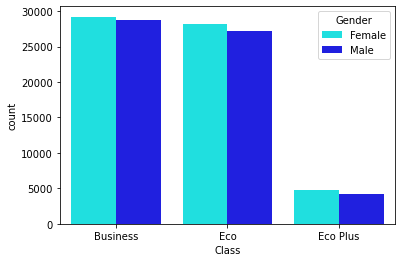

                        TotalRecords
Type of Travel  Gender              
Business travel Female         43200
                Male           41413
Personal Travel Female         18978
                Male           18863


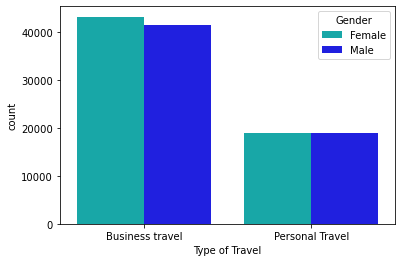

In [36]:
grp = df.groupby(['Class', "Gender"]).agg(TotalRecords = ('Class', 'size'))
print(grp)
sns.countplot(df.Class,
              hue = df.Gender,
              palette=['cyan','b'])
plt.show()


grp = df.groupby(['Type of Travel', "Gender"]).agg(TotalRecords = ('Type of Travel', 'size'))
print(grp)

sns.countplot(df['Type of Travel'],
              hue = df['Gender'], 
             palette = ['c', 'b'])
plt.show()

In [37]:
printmd('**Displaying first five rows of the df dataframe:**')
df.head(5)

**Displaying first five rows of the df dataframe:**

id  Gender   Customer Type  Age   Type of Travel     Class  \
0  114960  Female  Loyal Customer   55  Business travel  Business   
1  114960  Female  Loyal Customer   55  Business travel  Business   
2   43337    Male  Loyal Customer   36  Business travel       Eco   
3   43337    Male  Loyal Customer   36  Business travel       Eco   
4   74692  Female  Loyal Customer   17  Personal Travel       Eco   

   Flight Distance Age Group Route Category  Inflight wifi service  ...  \
0             2001     Adult    medium-haul                      2  ...   
1             2001     Adult    medium-haul                      2  ...   
2              387     Adult     short-haul                      3  ...   
3              387     Adult     short-haul                      3  ...   
4             1235  Teenager     short-haul                      3  ...   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 4                 4                4   
1                 4                 4                 4                4   
2                 1                 1                 1                2   
3                 1                 1                 1                2   
4                 3                 5                 5                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 4            3                          24   
1                 4            3                          24   
2                 1            3                           0   
3                 1            3                           0   
4                 4            4                           3   

   Arrival Delay in Minutes             satisfaction  Avg Satisfaction Rating  
0                      21.0                satisfied                      3.0  
1                      21.0                satisfied                      3.0  
2                       1.0  neutral or dissatisfied                      3.0  
3                       1.0  neutral or dissatisfied                      3.0  
4                       0.0  neutral or dissatisfied                      4.0  

[5 rows x 27 columns]

In [38]:
printmd('**No. of rows in the df dataframe:**')
print(df.shape[0])
printmd('**No. of columns in the df dataframe:**')
print(df.shape[1])

**No. of rows in the df dataframe:**

122454


**No. of columns in the df dataframe:**

27


<AxesSubplot:>

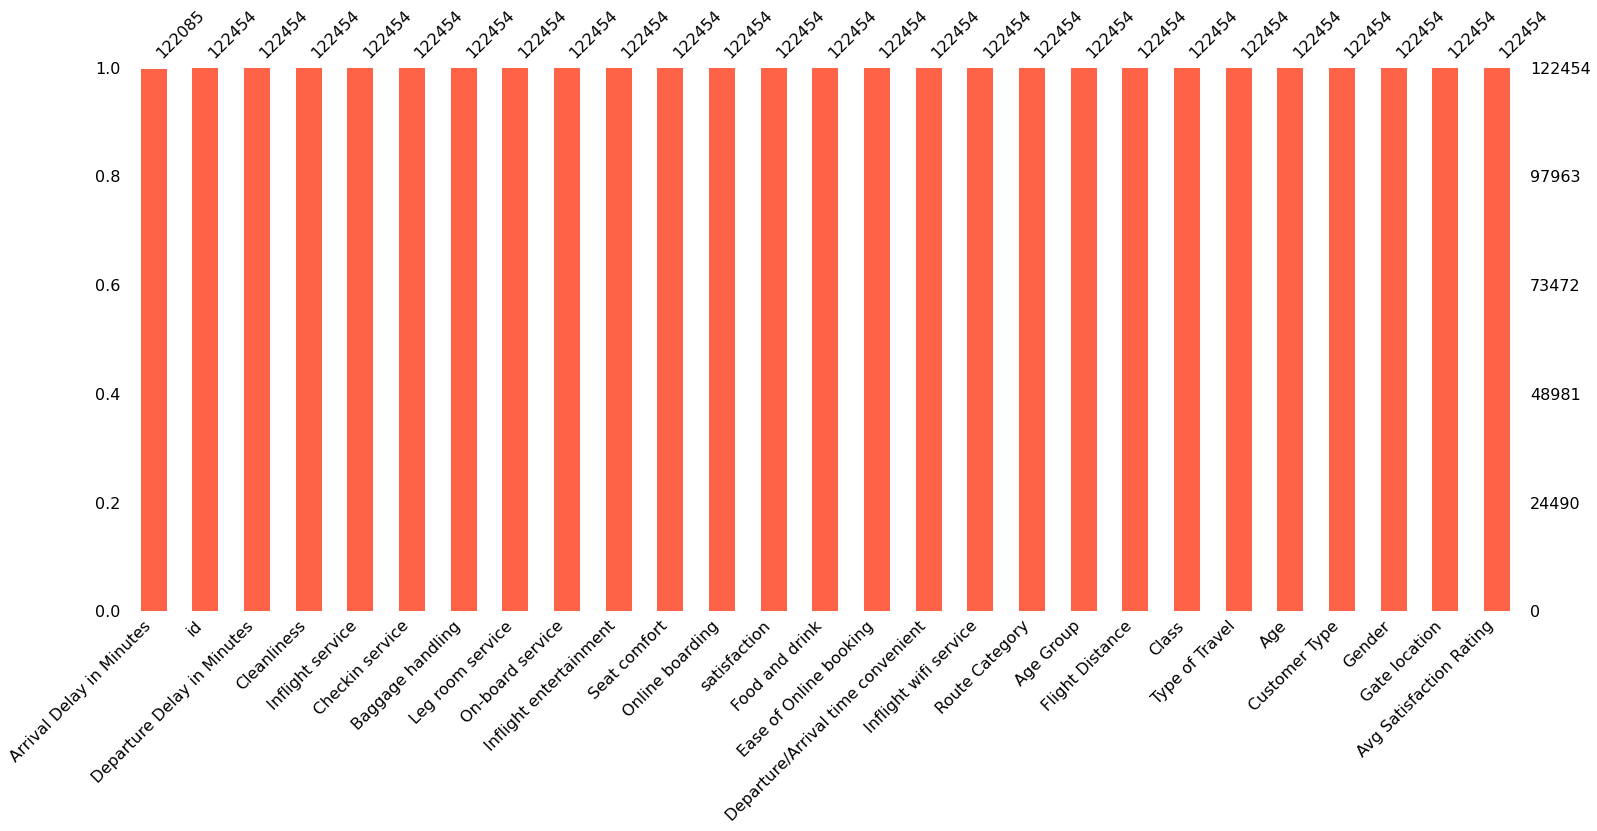

In [39]:
# Plotting bar chart using missingno
import missingno as msno
msno.bar(df,figsize=(25,10),sort="ascending", color="tomato")

**Observations**: It can be seen that, only **Arrival Delay in Minutes** column has missing values.

Again checking for the null values using conventional method

In [40]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Age Group                              0
Route Category                         0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in

In [41]:
missing_data = df.isnull().sum()
null_data = round(100.0*missing_data/df.shape[0],2)
null_data = pd.DataFrame(null_data,columns = ['missing_prcntg'])
null_data

missing_prcntg
id                                            0.0
Gender                                        0.0
Customer Type                                 0.0
Age                                           0.0
Type of Travel                                0.0
Class                                         0.0
Flight Distance                               0.0
Age Group                                     0.0
Route Category                                0.0
Inflight wifi service                         0.0
Departure/Arrival time convenient             0.0
Ease of Online booking                        0.0
Gate location                                 0.0
Food and drink                                0.0
Online boarding                               0.0
Seat comfort                                  0.0
Inflight entertainment                        0.0
On-board service                              0.0
Leg room service                              0.0
Baggage handling                              0.0
Checkin service                               0.0
Inflight service                              0.0
Cleanliness                                   0.0
Departure Delay in Minutes                    0.0
Arrival Delay in Minutes                      0.3
satisfaction                                  0.0
Avg Satisfaction Rating                       0.0

Since, **Arrival Delay in Minutes** column has missing values which is **0.3%** only, we can directly drop the rows having null values.

In [42]:
# Removing the rows having null values
df.dropna(axis = 0, inplace = True)

In [43]:
#Again checking for null values for sureity
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Age Group                            0
Route Category                       0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction             

#### Now looking for Duplicate values

In [44]:
df.duplicated().value_counts()

False    120634
True       1451
dtype: int64

There are **1451** no. of rows having duplicate values.

In [45]:
# Dropping the rows having duplicate values 
df.drop_duplicates(inplace = True)

In [46]:
#Again checking for duplicate values for sureity
df.duplicated().value_counts()

False    120634
dtype: int64

In [47]:
printmd('**Final shape of the df dataframe:**')
print(df.shape)

**Final shape of the df dataframe:**

(120634, 27)


In [48]:
# Now imputing the value as 'Yes' if the satisfaction equals to 'satisfied' else 'No' (for neutral or dissatisfied)
def yes_no(s):
    if s == 'satisfied':
        return 'yes'
    else:
        return 'no'
df['satisfaction'] = df['satisfaction'].apply(lambda x: yes_no(x))
df['satisfaction'].head(5)

0    yes
2     no
4     no
6     no
8    yes
Name: satisfaction, dtype: object

In [49]:
# Setting the 'id' column as index 
df.set_index(['id'], inplace = True)

In [50]:
df.head()

Gender   Customer Type  Age   Type of Travel     Class  \
id                                                               
114960  Female  Loyal Customer   55  Business travel  Business   
43337     Male  Loyal Customer   36  Business travel       Eco   
74692   Female  Loyal Customer   17  Personal Travel       Eco   
98299   Female  Loyal Customer   11  Personal Travel       Eco   
70039     Male  Loyal Customer   39  Business travel       Eco   

        Flight Distance Age Group Route Category  Inflight wifi service  \
id                                                                        
114960             2001     Adult    medium-haul                      2   
43337               387     Adult     short-haul                      3   
74692              1235  Teenager     short-haul                      3   
98299              1072  Pre-teen     short-haul                      3   
70039               183     Adult     short-haul                      4   

        Departure/Arrival time convenient  ...  On-board service  \
id                                         ...                     
114960                                  2  ...                 4   
43337                                   5  ...                 1   
74692                                   4  ...                 3   
98299                                   2  ...                 2   
70039                                   3  ...                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
id                                                                              
114960                 4                 4                4                 4   
43337                  1                 1                2                 1   
74692                  5                 5                3                 4   
98299                  3                 3                2                 4   
70039                  2                 1                4                 4   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
id                                                                          
114960            3                          24                      21.0   
43337             3                           0                       1.0   
74692             4                           3                       0.0   
98299             1                           0                       0.0   
70039             4                           0                       0.0   

        satisfaction  Avg Satisfaction Rating  
id                                             
114960           yes                      3.0  
43337             no                      3.0  
74692             no                      4.0  
98299             no                      2.0  
70039            yes                      3.0  

[5 rows x 26 columns]

Taking the list of column names having numerical & categorical variables into col_num & col_cat respectively.

In [51]:
#numerical variables
col_num = df.select_dtypes(exclude = 'object').columns
col_num

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Avg Satisfaction Rating'],
      dtype='object')

In [52]:
#categorical variables
col_cat = df.select_dtypes(include = 'object').columns
col_cat

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age Group',
       'Route Category', 'satisfaction'],
      dtype='object')

#### Now displaying the no. of unique values of all the categorical variables

In [53]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [54]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [55]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [56]:
df['Class'].unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [57]:
df['satisfaction'].unique()

array(['yes', 'no'], dtype=object)

In [58]:
df['Route Category'].unique()

array(['medium-haul', 'short-haul', 'long-haul'], dtype=object)

In [59]:
df['Age Group'].unique()

array(['Adult', 'Teenager', 'Pre-teen', 'Elderly', 'Child', 'Young Adult'],
      dtype=object)

#### Univariate Analysis

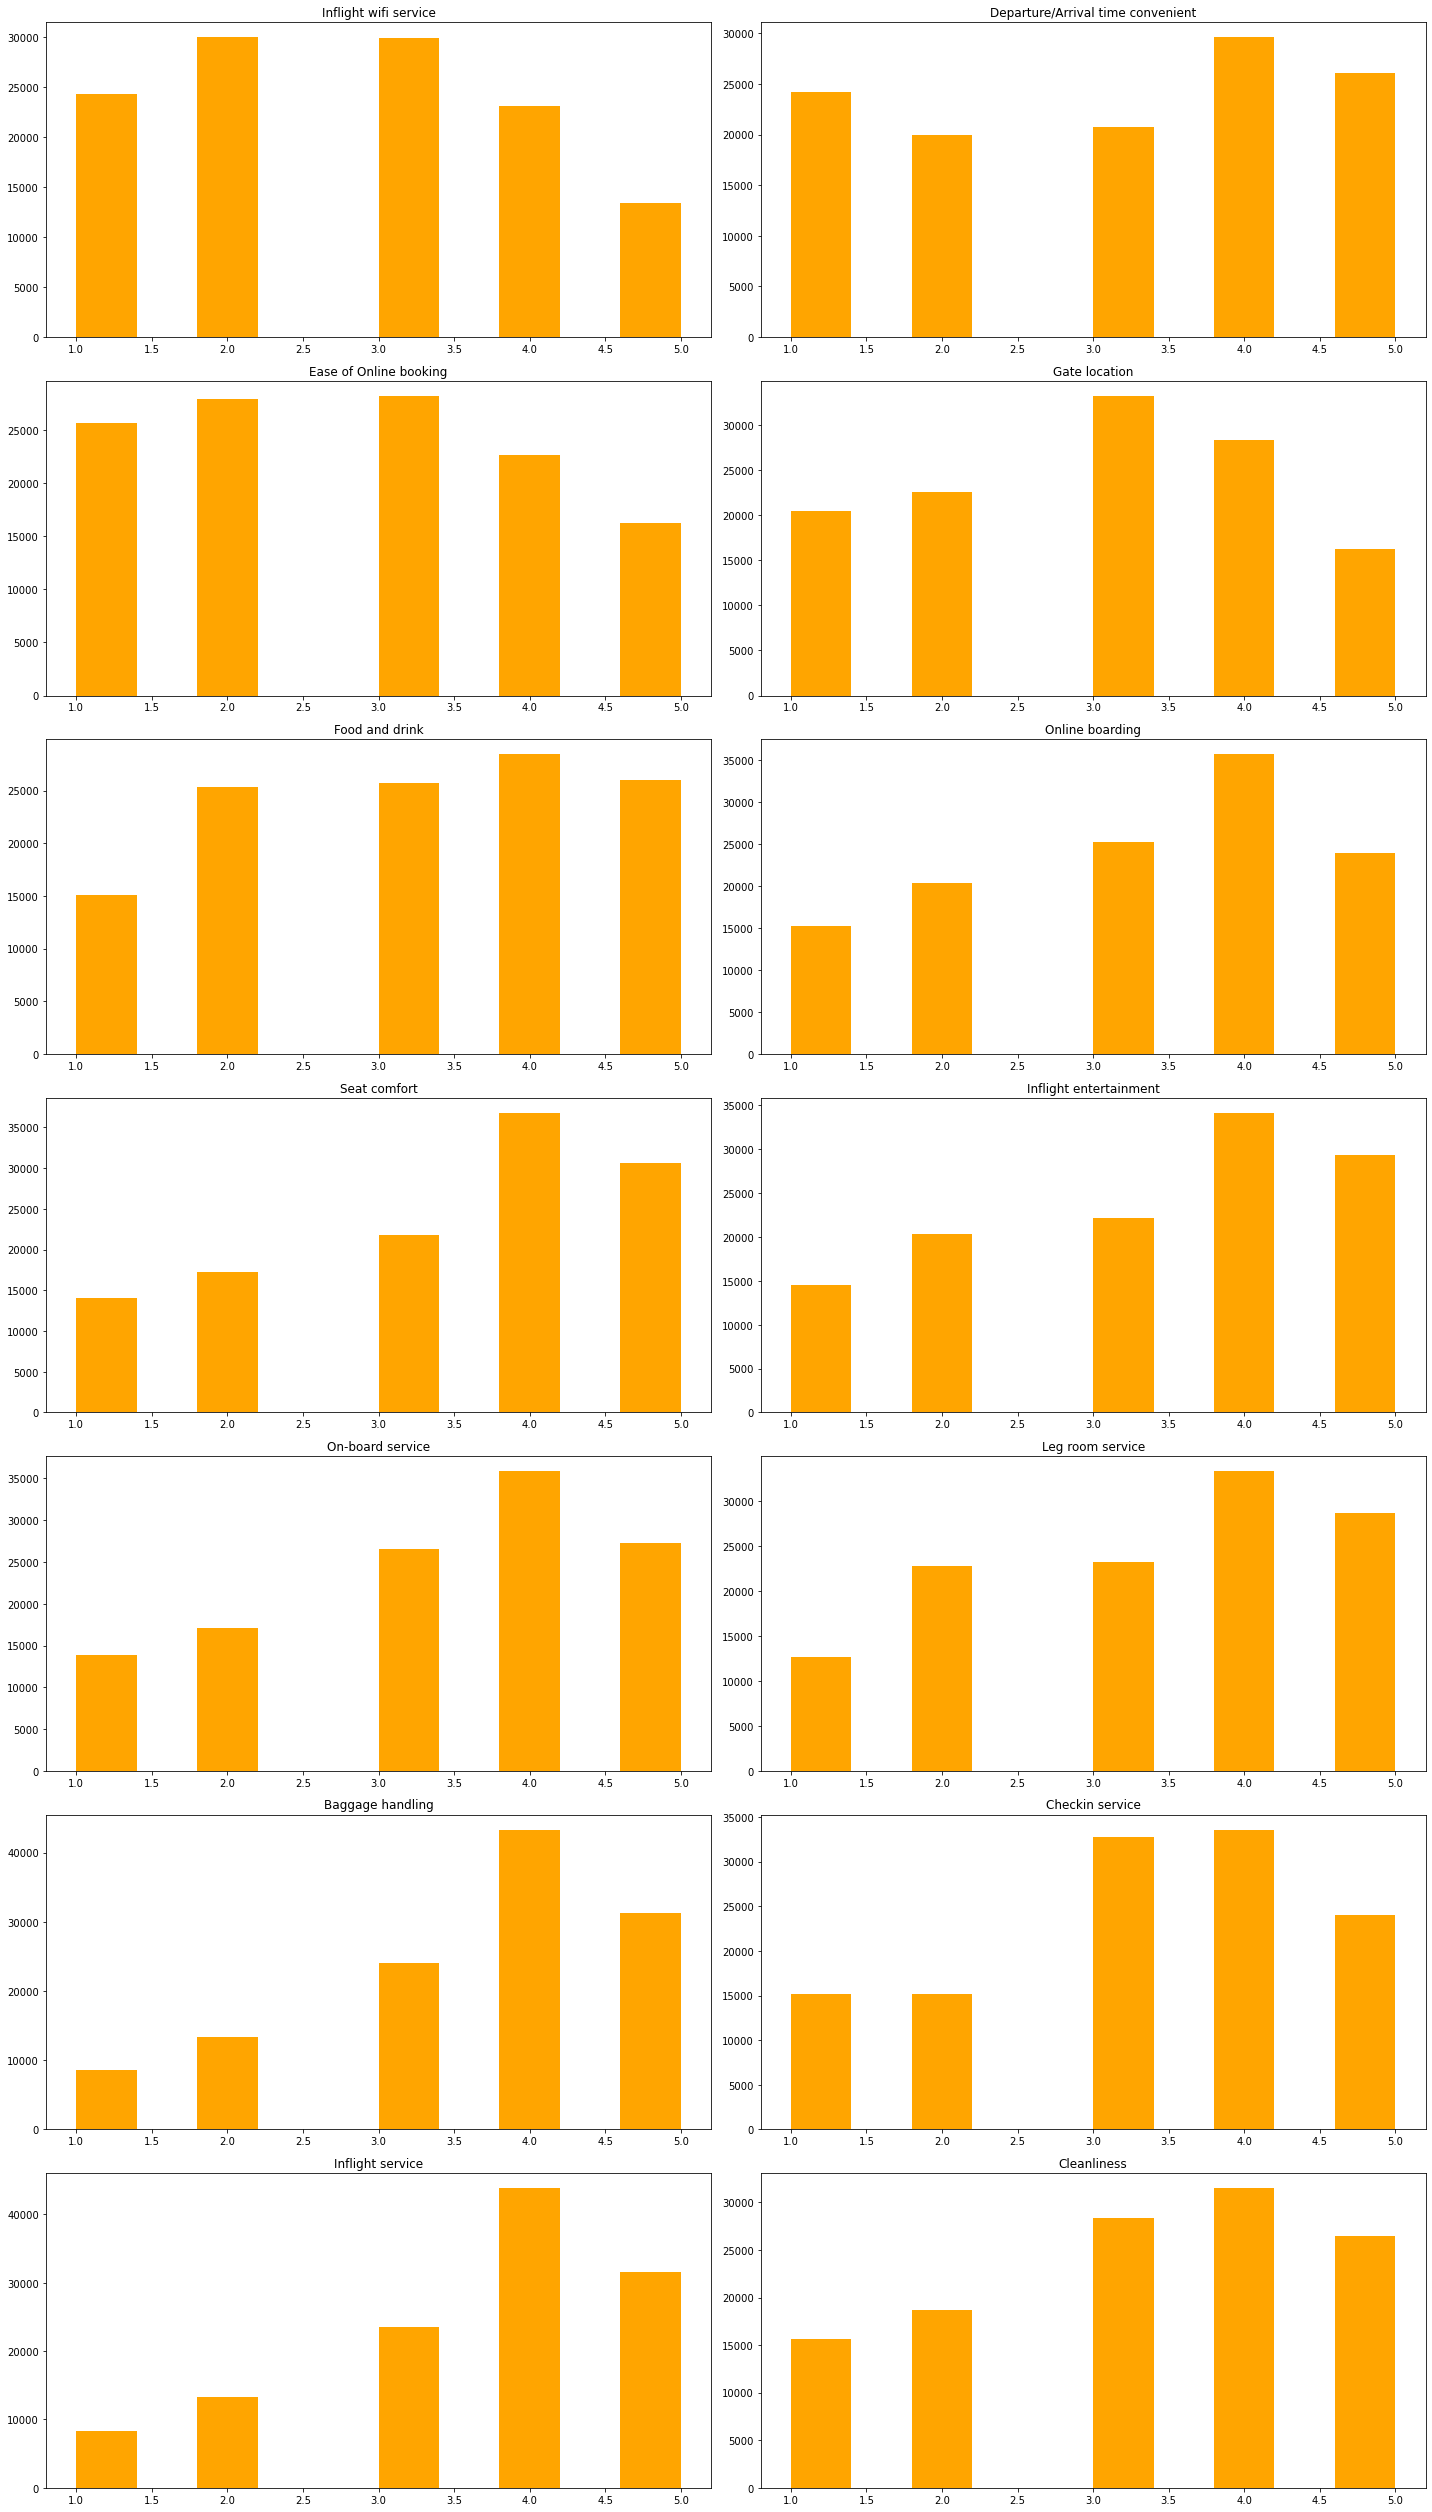

In [60]:
#Plotting the distribution for all the discrete variables
nrows=7
ncols=2
cols = df.columns
fig, axes = plt.subplots(nrows, ncols, figsize=(20,35)) 
axes = axes.flatten()   
for ax,col in zip(axes,discrete_num):
    ax.hist(df[col],color="orange")
    ax.set_title(col)
    
plt.tight_layout()

In [61]:
printmd('**Displaying the mostly rated rating for all the service categories:**')

for var in discrete_num:
    print('{} ----> {}'.format(var,df[var].mode()[0]))

**Displaying the mostly rated rating for all the service categories:**

Inflight wifi service ----> 2
Departure/Arrival time convenient ----> 4
Ease of Online booking ----> 3
Gate location ----> 3
Food and drink ----> 4
Online boarding ----> 4
Seat comfort ----> 4
Inflight entertainment ----> 4
On-board service ----> 4
Leg room service ----> 4
Baggage handling ----> 4
Checkin service ----> 4
Inflight service ----> 4
Cleanliness ----> 4


**Observation**: In the above, in most of the services, **4** rating is given most no. of times by the customers.

Text(0.5, 1.0, 'Distribution Plot of Arrival Delay in Minutes')

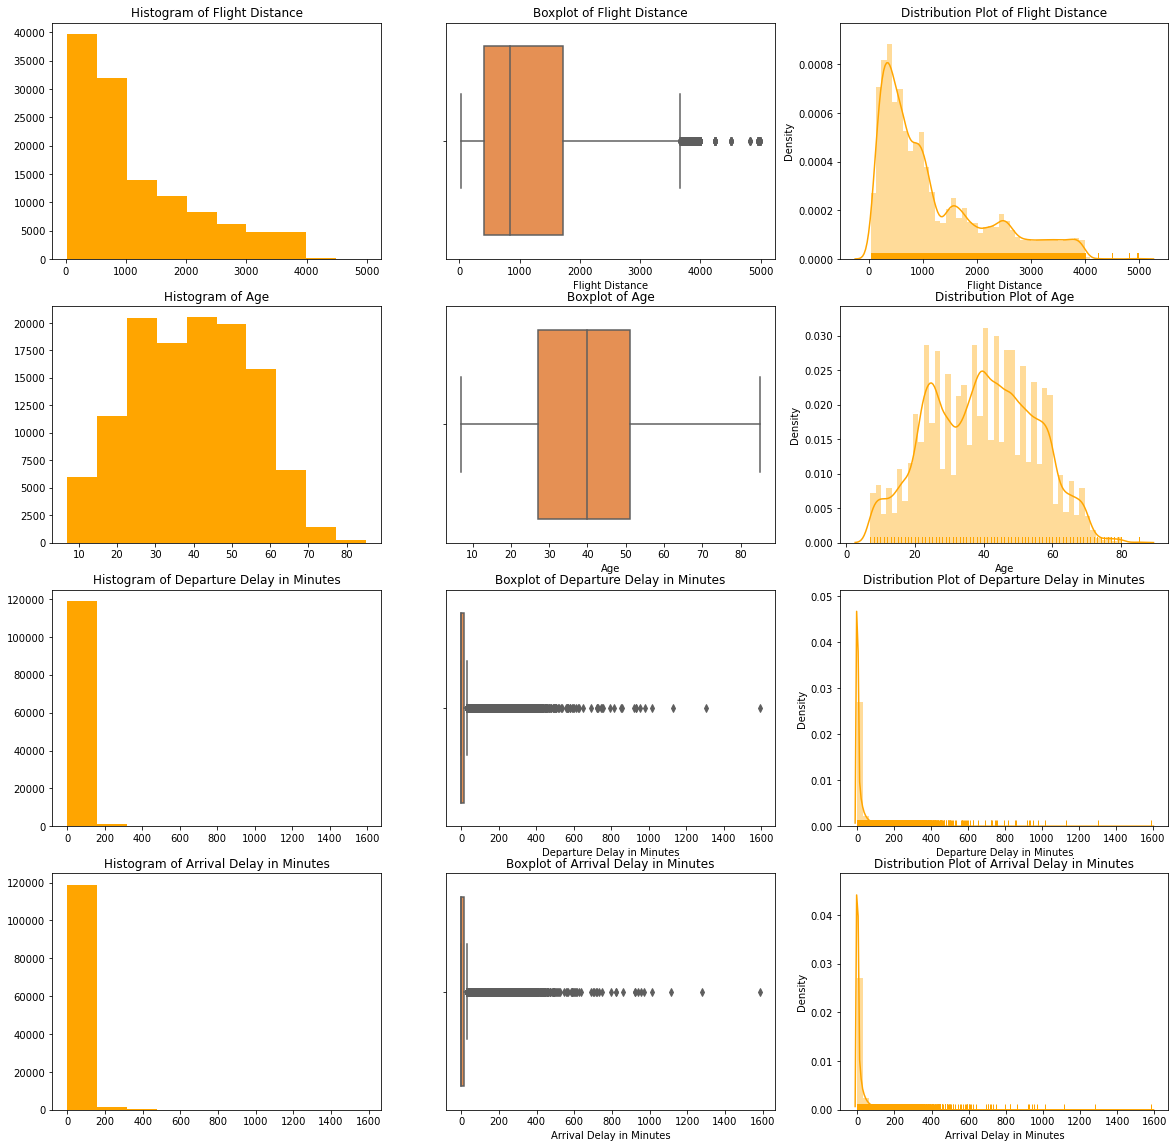

In [62]:
figure, axis = plt.subplots(4,3,figsize = (20,20))

axis[0,0].hist(df['Flight Distance'],color="orange")
axis[0,0].set_title('Histogram of Flight Distance')
sns.boxplot(x=df['Flight Distance'], ax=axis[0,1],palette="Oranges")
axis[0,1].set_title('Boxplot of Flight Distance')
sns.distplot(df['Flight Distance'],ax = axis[0,2],color="orange", rug = True)
axis[0,2].set_title('Distribution Plot of Flight Distance')

axis[1,0].hist(df['Age'],color="orange")
axis[1,0].set_title('Histogram of Age')
sns.boxplot(x=df['Age'], ax=axis[1,1],palette="Oranges")
axis[1,1].set_title('Boxplot of Age')
sns.distplot(df['Age'],ax = axis[1,2],color="orange",rug = True)
axis[1,2].set_title('Distribution Plot of Age')

axis[2,0].hist(df['Departure Delay in Minutes'],color="orange")
axis[2,0].set_title('Histogram of Departure Delay in Minutes')
sns.boxplot(x=df['Departure Delay in Minutes'], ax=axis[2,1],palette="Oranges")
axis[2,1].set_title('Boxplot of Departure Delay in Minutes')
sns.distplot(df['Departure Delay in Minutes'],ax = axis[2,2],color="orange", rug = True)
axis[2,2].set_title('Distribution Plot of Departure Delay in Minutes')

axis[3,0].hist(df['Arrival Delay in Minutes'],color="orange")
axis[3,0].set_title('Histogram of Arrival Delay in Minutes')
sns.boxplot(x=df['Arrival Delay in Minutes'], ax=axis[3,1],palette="Oranges")
axis[3,1].set_title('Boxplot of Arrival Delay in Minutes')
sns.distplot(df['Arrival Delay in Minutes'],ax = axis[3,2],color="orange", rug = True)
axis[3,2].set_title('Distribution Plot of Arrival Delay in Minutes')


**Observations**:
    
--- In the **Flight Distance**, the distribution is **right-skewed**.The datapoints having value greater than **3600** are outliers.

--- In the **Age**, the data is **normally distributed**. There are no outliers.

--- In the **Departure Delay in Minutes** and **Arrival Delay in Minutes**, the distribution is not normal and consisting lots of outliers.


Text(0.5, 1.0, 'Route Category Distribution Plot')

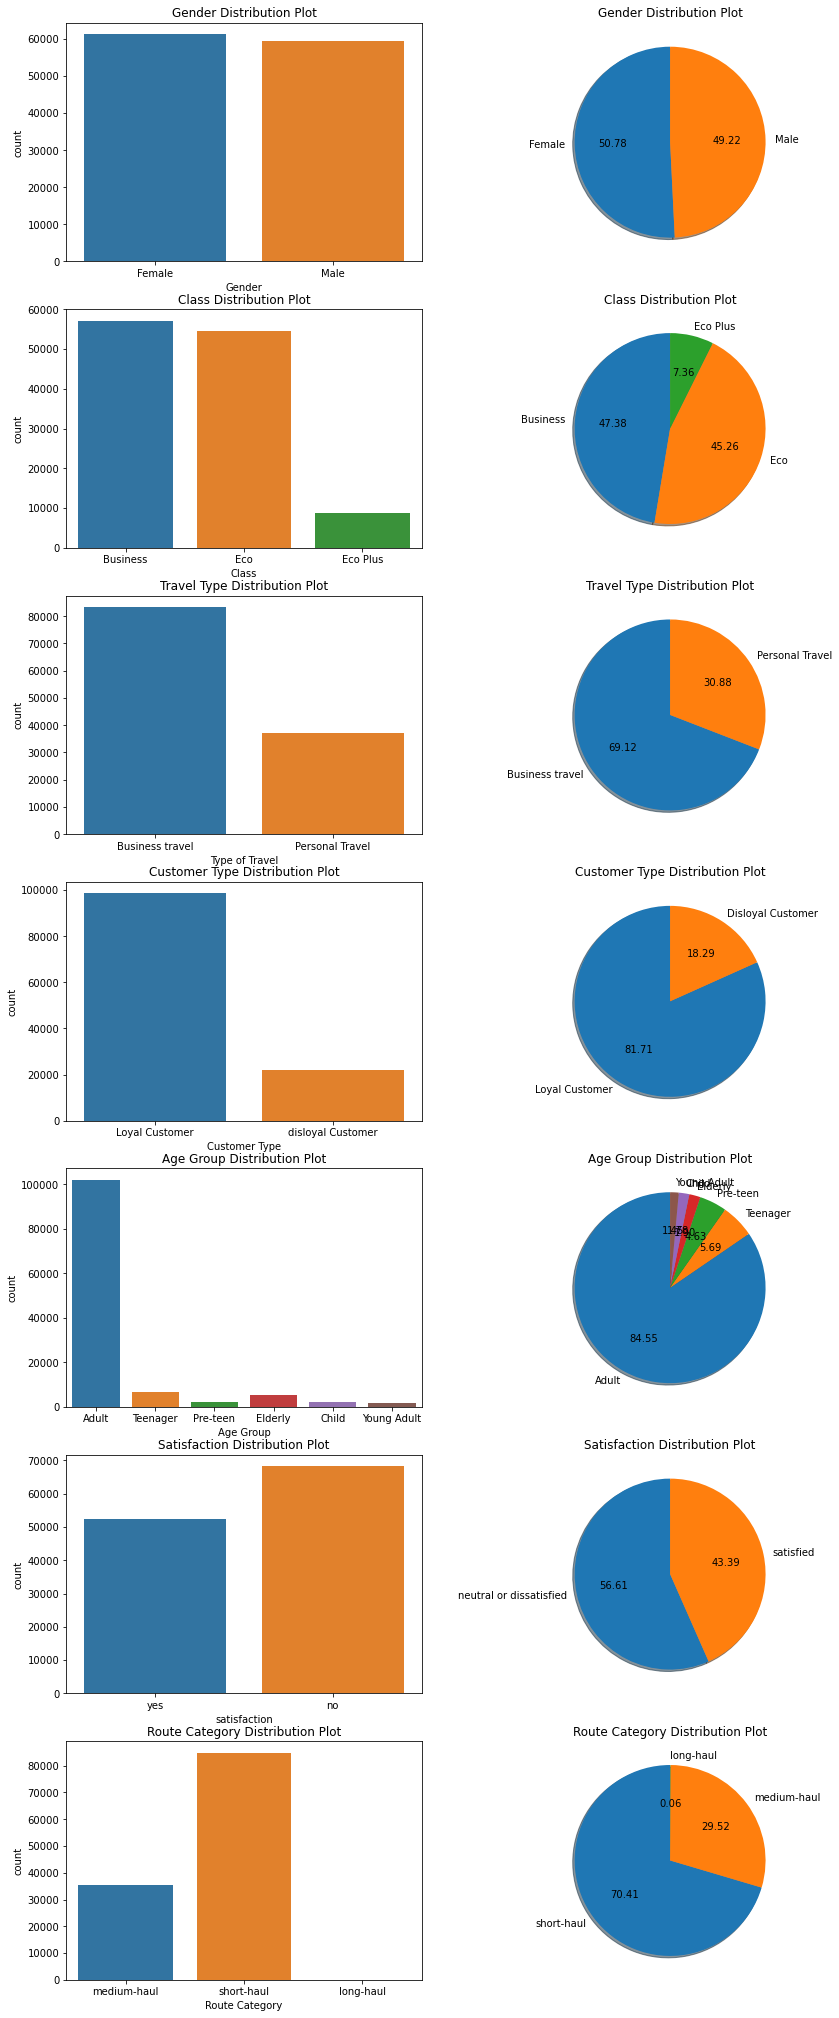

In [63]:
figure, axis = plt.subplots(7,2,figsize = (14,36))

sns.countplot(df['Gender'], ax=axis[0,0])
axis[0,0].set_title('Gender Distribution Plot')
axis[0,1].pie(df['Gender'].value_counts(),startangle = 90,autopct = '%.2f', labels = ['Female','Male'],shadow = True)
axis[0,1].set_title('Gender Distribution Plot')

sns.countplot(df['Class'], ax=axis[1,0])
axis[1,0].set_title('Class Distribution Plot')
axis[1,1].pie(df['Class'].value_counts(),startangle = 90,autopct = '%.2f', labels = ['Business', 'Eco', 'Eco Plus'],shadow = True)
axis[1,1].set_title('Class Distribution Plot')

sns.countplot(df['Type of Travel'], ax=axis[2,0])
axis[2,0].set_title('Travel Type Distribution Plot')
axis[2,1].pie(df['Type of Travel'].value_counts(),startangle = 90,autopct = '%.2f', labels = ['Business travel', 'Personal Travel'],shadow = True)
axis[2,1].set_title('Travel Type Distribution Plot')

sns.countplot(df['Customer Type'], ax=axis[3,0])
axis[3,0].set_title('Customer Type Distribution Plot')
axis[3,1].pie(df['Customer Type'].value_counts(),startangle = 90,autopct = '%.2f', labels = ['Loyal Customer', 'Disloyal Customer'],shadow = True)
axis[3,1].set_title('Customer Type Distribution Plot')

sns.countplot(df['Age Group'], ax=axis[4,0])
axis[4,0].set_title('Age Group Distribution Plot')
axis[4,1].pie(df['Age Group'].value_counts(),startangle = 90,autopct = '%.2f', 
              labels = ['Adult', 'Teenager', 'Pre-teen', 'Elderly', 'Child', 'Young Adult'],shadow = True)
axis[4,1].set_title('Age Group Distribution Plot')

sns.countplot(df['satisfaction'], ax=axis[5,0])
axis[5,0].set_title('Satisfaction Distribution Plot')
axis[5,1].pie(df['satisfaction'].value_counts(),startangle = 90,autopct = '%.2f',labels = ['neutral or dissatisfied','satisfied'], shadow = True)
axis[5,1].set_title('Satisfaction Distribution Plot')

sns.countplot(df['Route Category'], ax=axis[6,0])
axis[6,0].set_title('Route Category Distribution Plot')
axis[6,1].pie(df['Route Category'].value_counts(),startangle = 90,autopct = '%.2f',labels = ['short-haul','medium-haul' , 'long-haul'], shadow = True)
axis[6,1].set_title('Route Category Distribution Plot')

**Observations**:

--- The ratio of **Male(49.22%)** & **Female(50.78%)** is almost same.

--- Most **(47.38%)** of the customers preferred to travel in **Business class** & least **(45.25)** for the **Eco Plus class**

--- Customers mostly travelling for the **Business(69.12%)** reasons than for **Personal(30.88%)**

--- **81.71%** of the customers are **loyal** while **18.29%** are **disloyal**.

--- Almost **84.55%** of customers fall in the **Adult(21-64)** Age-Group. Least no. of the customers are from **Young Adult(age=20)** group.

--- According to the data, only **43.36%** customers are satisfied with the services provided by the companies.

--- In the **Route Category**, it can be stated that most **(70.41%)** of the customers prefer to travel **short haul (1100-1500 km).

#### Bivariate Analysis

#### Customers satisfaction while travelling for Business or Personal travel.

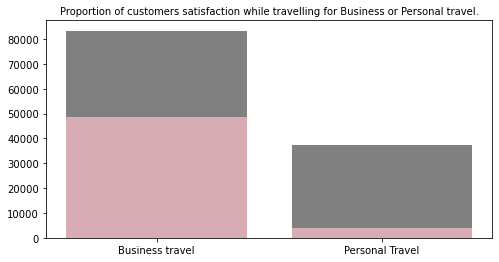

**58%** of customers are satisfied during **Business travel**

**10%** of customers are satisfied during **Personal Travel**

In [64]:
data = df
type_ = df['Type of Travel'].unique()
type_cat = []
yes_satisfaction = []
for var in type_:
    x = df['Type of Travel'][data['Type of Travel']==var].count()
    y = df['Type of Travel'][(df['Type of Travel']==var)&(df['satisfaction']=='yes')].count()
    type_cat.append(x)
    yes_satisfaction.append(y)
plt.figure(figsize=(8,4))
plt.bar(type_ , type_cat,color='grey')
plt.bar(type_ , yes_satisfaction,color='pink', alpha = 0.7)
plt.title('Proportion of customers satisfaction while travelling for Business or Personal travel.', fontsize = 10)
plt.show()

for var in df['Type of Travel'].unique():
    satisfied = round(100*df[df['Type of Travel']==var][df['satisfaction'] == 'yes'].shape[0]/df[df['Type of Travel']==var].shape[0])
    printmd('**{}%** of customers are satisfied during **{}**'.format(satisfied,var))

#### Customers satisfaction while travelling in Business, Eco or Eco Plus class.

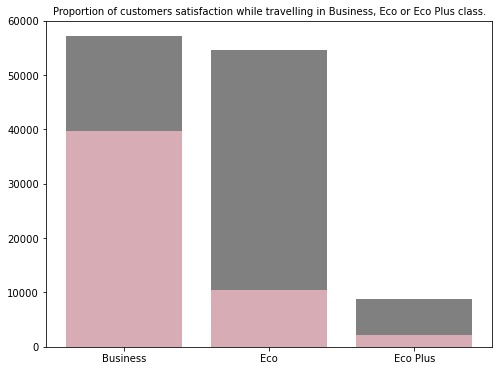

**69%** of customers are satisfied while travelling in **Business** class

**19%** of customers are satisfied while travelling in **Eco** class

**25%** of customers are satisfied while travelling in **Eco Plus** class

In [65]:
data = df
type_ = df['Class'].unique()
type_cat = []
yes_satisfaction = []
for var in type_:
    x = df['Class'][data['Class']==var].count()
    y = df['Class'][(df['Class']==var)&(df['satisfaction']=='yes')].count()
    type_cat.append(x)
    yes_satisfaction.append(y)
plt.figure(figsize=(8,6))
plt.bar(type_ , type_cat,color='grey')
plt.bar(type_ , yes_satisfaction,color='pink', alpha = 0.7)
plt.title('Proportion of customers satisfaction while travelling in Business, Eco or Eco Plus class.', fontsize = 10)
plt.show()

for var in df['Class'].unique():
    satisfied = round(100*df[df['Class']==var][df['satisfaction'] == 'yes'].shape[0]/df[df['Class']==var].shape[0])
    printmd('**{}%** of customers are satisfied while travelling in **{}** class'.format(satisfied,var))

#### Percentage of Loyal or Dis-Loyal Customers satisfaction.

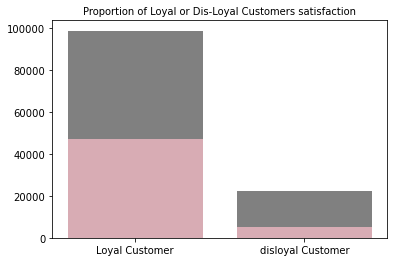

**48%** of **Loyal Customer** are satisfied

**24%** of **disloyal Customer** are satisfied

In [66]:
data = df
type_ = df['Customer Type'].unique()
type_cat = []
yes_satisfaction = []
for var in type_:
    x = df['Customer Type'][data['Customer Type']==var].count()
    y = df['Customer Type'][(df['Customer Type']==var)&(df['satisfaction']=='yes')].count()
    type_cat.append(x)
    yes_satisfaction.append(y)
plt.figure(figsize=(6,4))
plt.bar(type_ , type_cat,color='grey')
plt.bar(type_ , yes_satisfaction,color='pink', alpha = 0.7)
plt.title('Proportion of Loyal or Dis-Loyal Customers satisfaction', fontsize = 10)
plt.show()

for var in df['Customer Type'].unique():
    satisfied = round(100*df[df['Customer Type']==var][df['satisfaction'] == 'yes'].shape[0]/df[df['Customer Type']==var].shape[0])
    printmd('**{}%** of **{}** are satisfied'.format(satisfied,var))

#### Percentage of Male & Female Customers satisfaction.

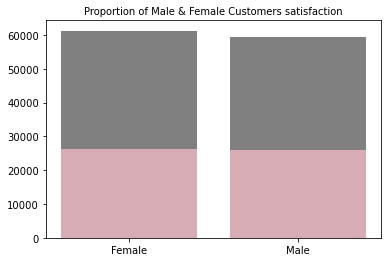

**43%** of **Female** customers are satisfied

**44%** of **Male** customers are satisfied

In [67]:
data = df
type_ = df['Gender'].unique()
type_cat = []
yes_satisfaction = []
for var in type_:
    x = df['Gender'][data['Gender']==var].count()
    y = df['Gender'][(df['Gender']==var)&(df['satisfaction']=='yes')].count()
    type_cat.append(x)
    yes_satisfaction.append(y)
plt.figure(figsize=(6,4))
plt.bar(type_ , type_cat,color='grey')
plt.bar(type_ , yes_satisfaction,color='pink', alpha = 0.7)
plt.title('Proportion of Male & Female Customers satisfaction', fontsize = 10)
plt.show()

for var in df['Gender'].unique():
    satisfied = round(100*df[df['Gender']==var][df['satisfaction'] == 'yes'].shape[0]/df[df['Gender']==var].shape[0])
    printmd('**{}%** of **{}** customers are satisfied'.format(satisfied,var))

#### Plotting the scatter plot b/w all the continuous variables

<AxesSubplot:xlabel='Flight Distance', ylabel='Age'>

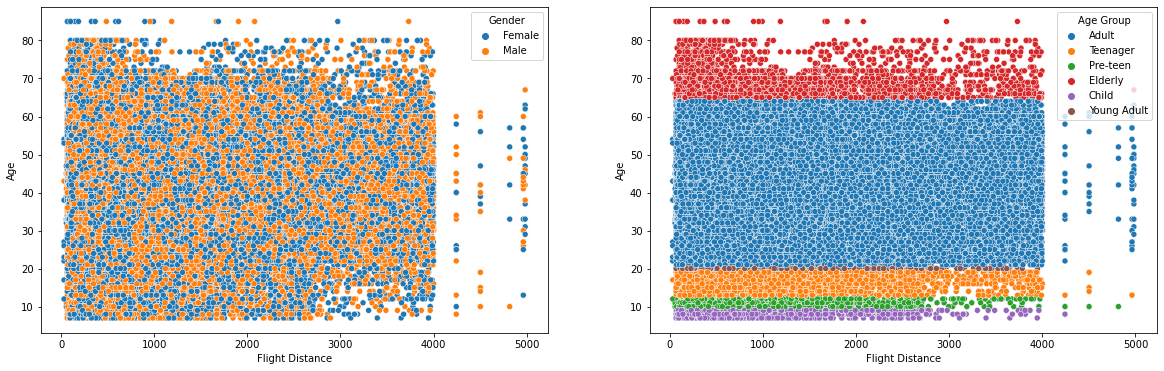

In [68]:
figure, axis = plt.subplots(1,2,figsize = (20,6))

sns.scatterplot(x = 'Flight Distance', y = 'Age', data = df, hue = 'Gender', ax = axis[0])
sns.scatterplot(x = 'Flight Distance', y = 'Age', data = df, hue = 'Age Group', ax = axis[1])

<AxesSubplot:xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>

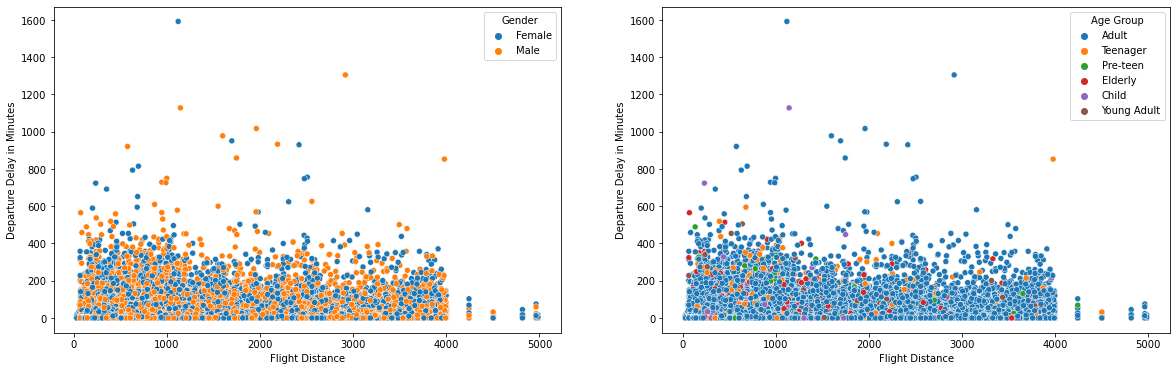

In [69]:
figure, axis = plt.subplots(1,2,figsize = (20,6))

sns.scatterplot(x = 'Flight Distance', y = 'Departure Delay in Minutes', data = df, hue = 'Gender', ax = axis[0])
sns.scatterplot(x = 'Flight Distance', y = 'Departure Delay in Minutes', data = df, hue = 'Age Group', ax = axis[1])

<AxesSubplot:xlabel='Flight Distance', ylabel='Arrival Delay in Minutes'>

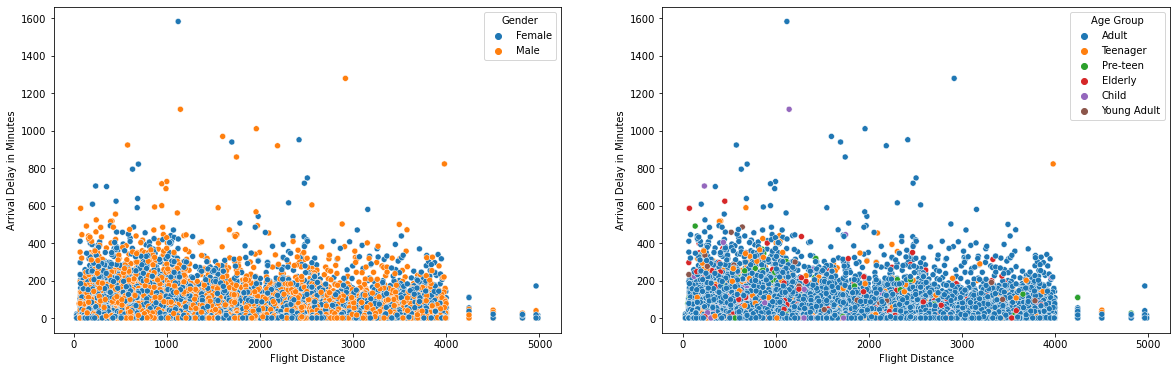

In [70]:
figure, axis = plt.subplots(1,2,figsize = (20,6))

sns.scatterplot(x = 'Flight Distance', y = 'Arrival Delay in Minutes', data = df, hue = 'Gender',ax=axis[0])
sns.scatterplot(x = 'Flight Distance', y = 'Arrival Delay in Minutes', data = df, hue = 'Age Group',ax=axis[1])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Age'>

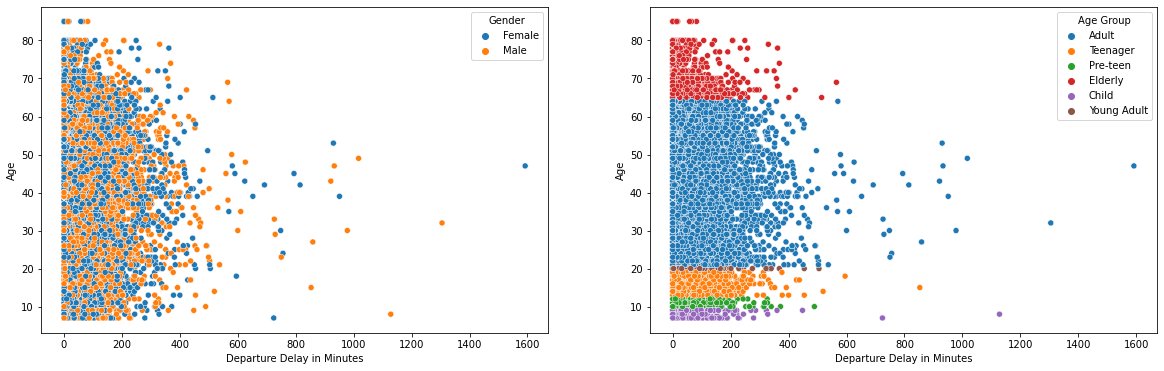

In [71]:
figure, axis = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Age', data = df, hue = 'Gender',ax=axis[0])
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Age', data = df, hue = 'Age Group',ax=axis[1])

<AxesSubplot:xlabel='Age', ylabel='Arrival Delay in Minutes'>

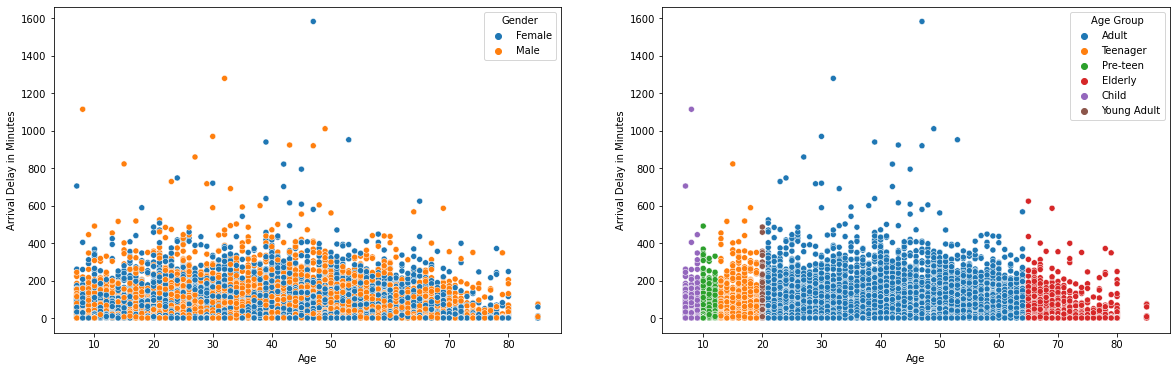

In [72]:
figure, axis = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x = 'Age', y = 'Arrival Delay in Minutes', data = df, hue = 'Gender',ax = axis[0])
sns.scatterplot(x = 'Age', y = 'Arrival Delay in Minutes', data = df, hue = 'Age Group',ax = axis[1])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

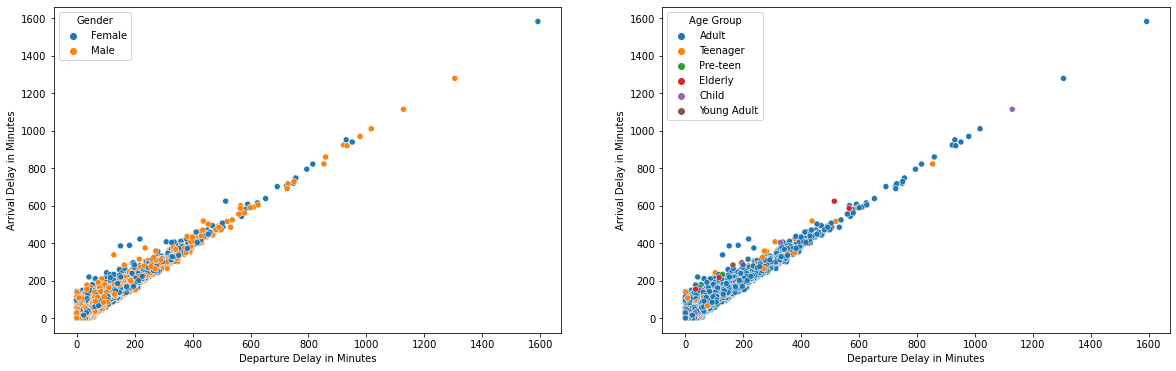

In [73]:
figure, axis = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, hue = 'Gender', ax=axis[0])
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, hue = 'Age Group', ax=axis[1])

**Observations**:

-- There are no clear patterns found in all the above charts except chart b/w **Departure Delay in Minutes** & **Arrival Delay in Minutes**

-- Here, there is some pattern in this chart. The **Departure Delay in Minutes** and **Arrival Delay in Minutes** is linearly related to each other. It can be stated that with the increase in Arrival Delay time, Departure Delay time also increases and vice versa.

<AxesSubplot:xlabel='Age', ylabel='Arrival Delay in Minutes'>

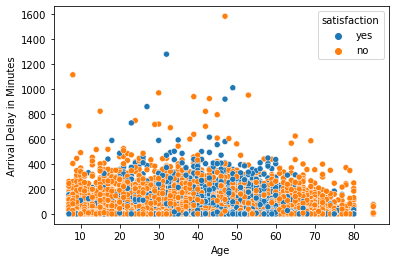

In [74]:
sns.scatterplot(data = df,x = df['Age'], y = df['Arrival Delay in Minutes'], hue = 'satisfaction')

**Observations**: When the arrival is delayed, customers having age less than 30 and greater than 60 are mostly unsatisfied.

<AxesSubplot:xlabel='Age', ylabel='Departure Delay in Minutes'>

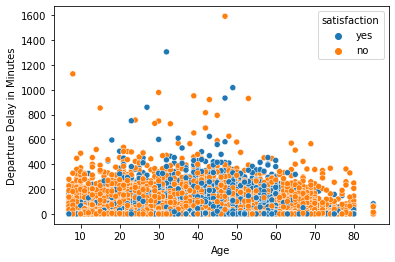

In [75]:
sns.scatterplot(data = df,x = df['Age'], y = df['Departure Delay in Minutes'], hue = 'satisfaction')

**Observations**:Similarly, when the departure is delayed (less than 400 minutes), customers having age less than 30 and greater than 60 are mostly unsatisfied.

In [76]:
df.groupby(['Route Category'])['satisfaction'].value_counts()

Route Category  satisfaction
long-haul       yes                43
                no                 35
medium-haul     yes             23676
                no              11936
short-haul      no              56321
                yes             28623
Name: satisfaction, dtype: int64

In [77]:
for var in ['medium-haul', 'short-haul', 'long-haul']:
    x = ''
    if var == 'medium-haul':
        x = '(1500 km - 4100 km)'
    elif var == 'short-haul':
        x = '(less than 1500 km)'
    else:
        x = '(more than 4100 km)'
        
    yes_satisfaction = round(100*df[df['Route Category'] == var][df['satisfaction']=='yes'].shape[0]/df[df['Route Category'] == var].shape[0],2)
    printmd('**{}%** of customers are satisfied while travelling through **{}** i.e **{}** route flight.'.format(yes_satisfaction,var,x))

**66.48%** of customers are satisfied while travelling through **medium-haul** i.e **(1500 km - 4100 km)** route flight.

**33.7%** of customers are satisfied while travelling through **short-haul** i.e **(less than 1500 km)** route flight.

**55.13%** of customers are satisfied while travelling through **long-haul** i.e **(more than 4100 km)** route flight.

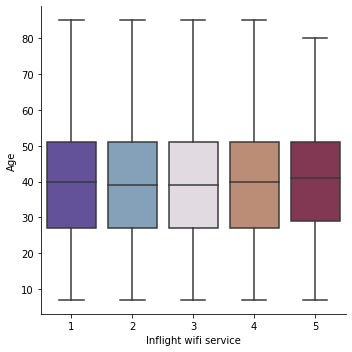

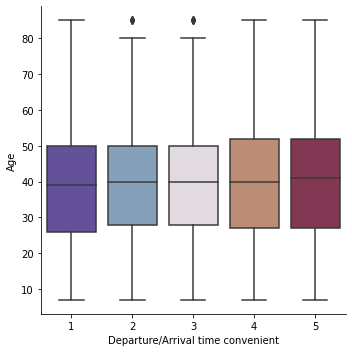

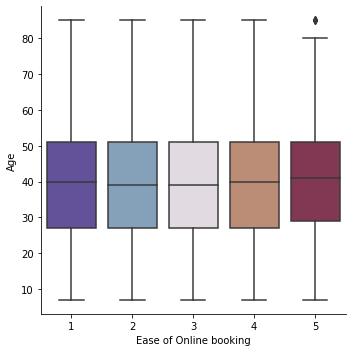

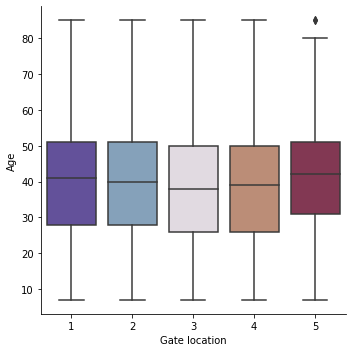

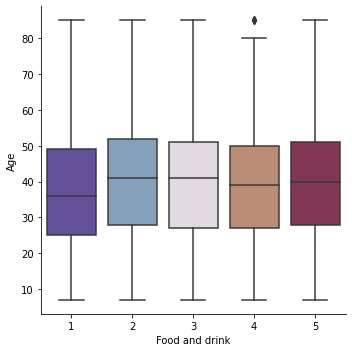

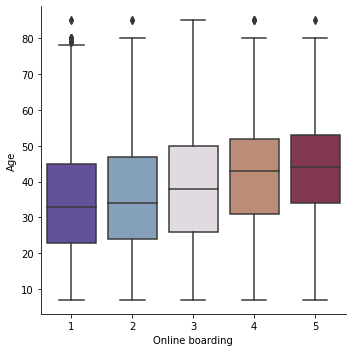

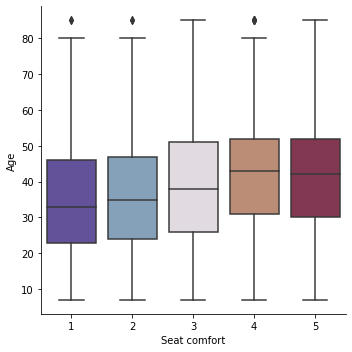

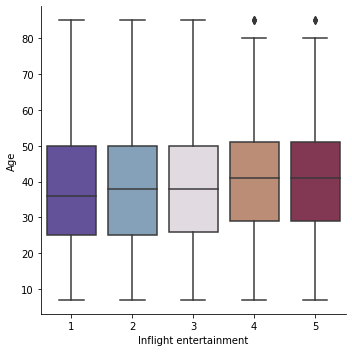

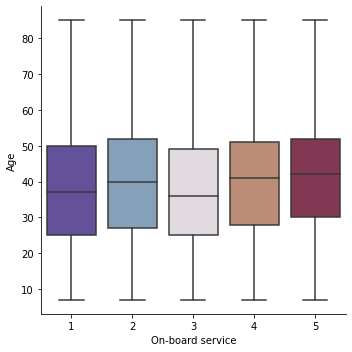

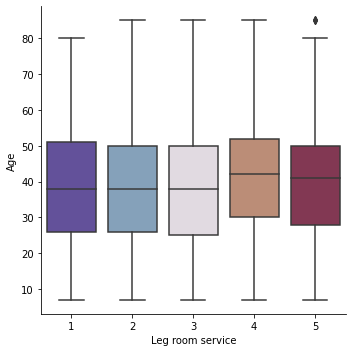

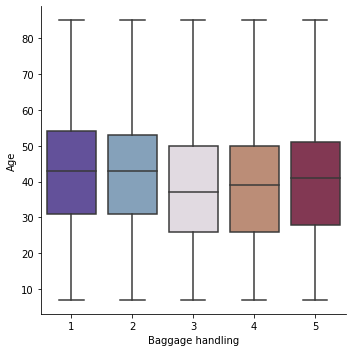

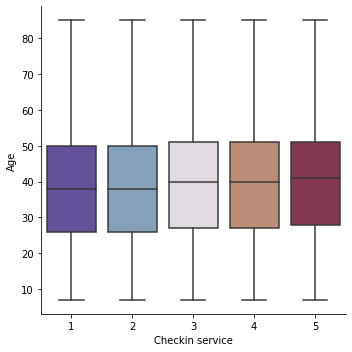

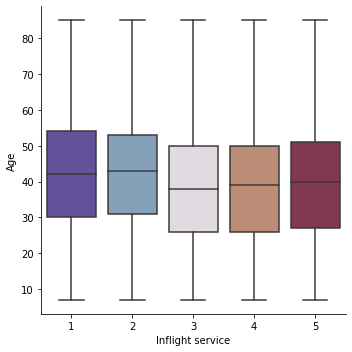

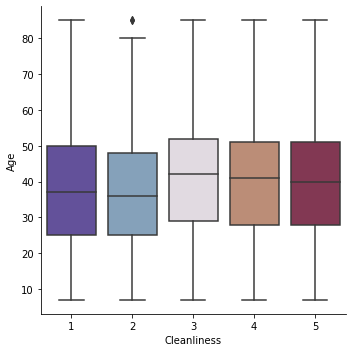

In [78]:
cols = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
for i, var in enumerate(cols):
#     fig, axes = plt.subplots(figsize=(16,20)) 
    sns.catplot(data=df, x=var, y="Age",kind="box",ax = axes,palette="twilight_shifted")
plt.show()

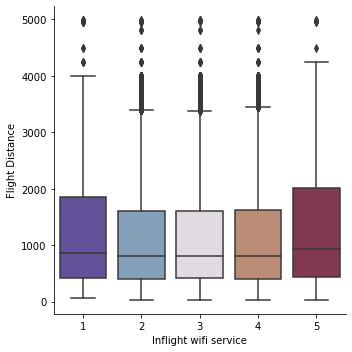

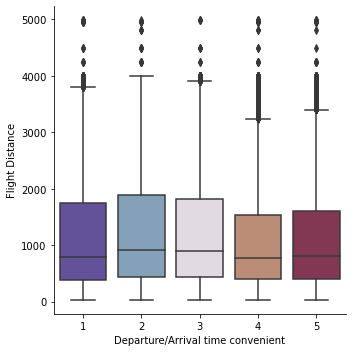

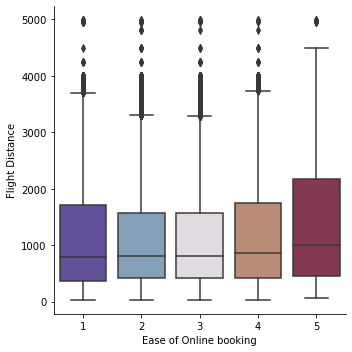

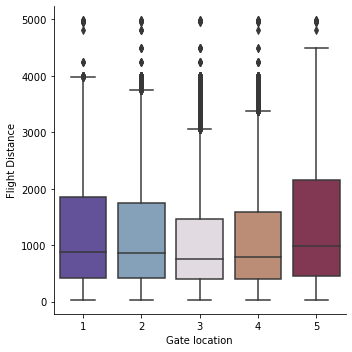

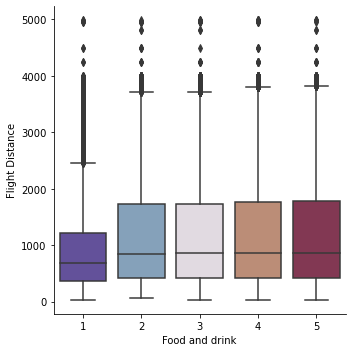

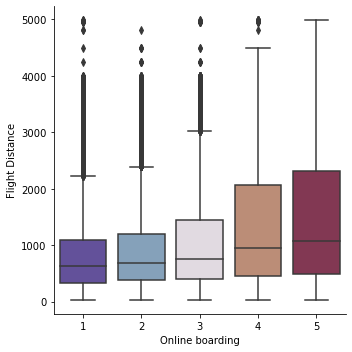

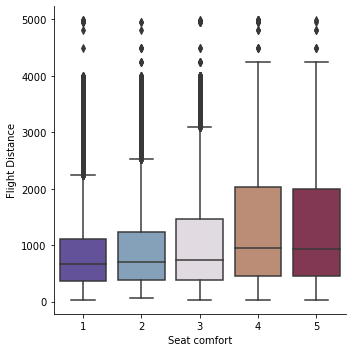

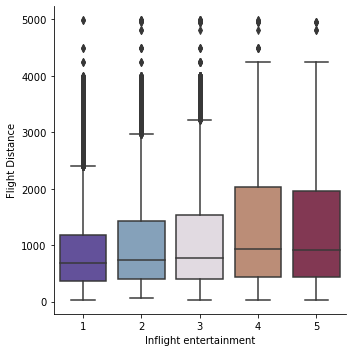

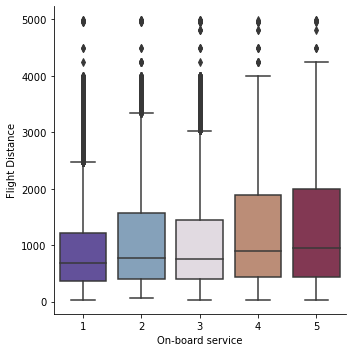

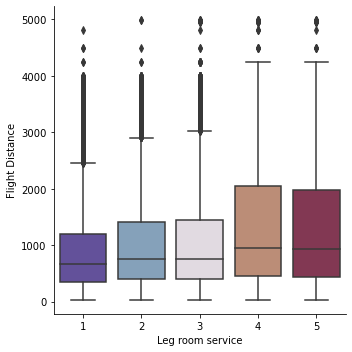

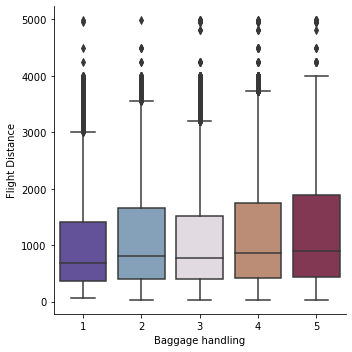

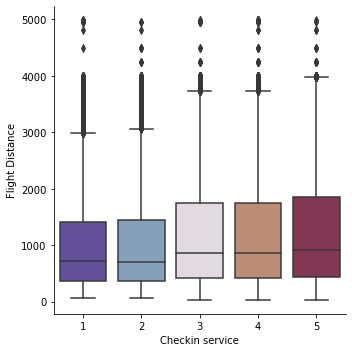

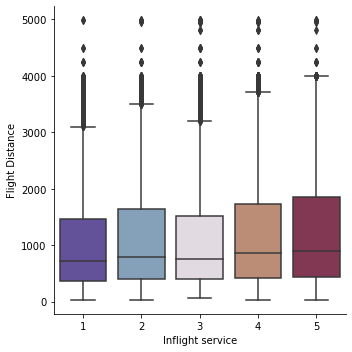

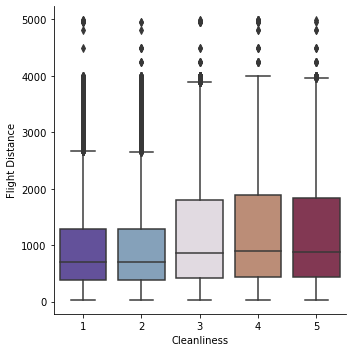

In [79]:
cols = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
for i, var in enumerate(cols):
#     fig, axes = plt.subplots(figsize=(16,20)) 
    sns.catplot(data=df, x=var, y='Flight Distance',kind="box",ax = axes,palette="twilight_shifted")
plt.show()

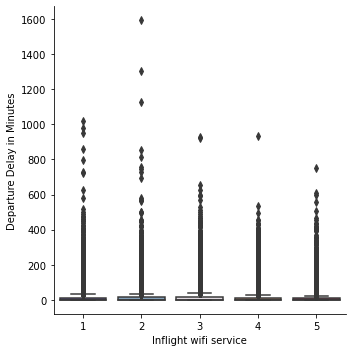

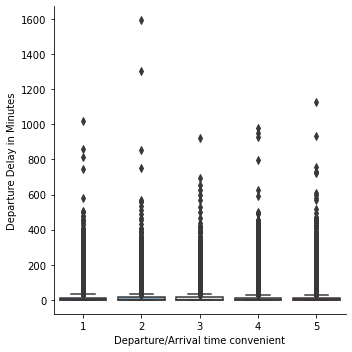

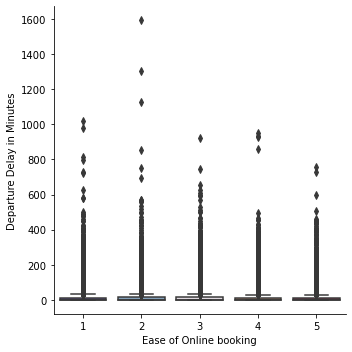

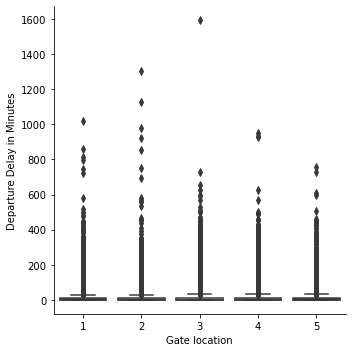

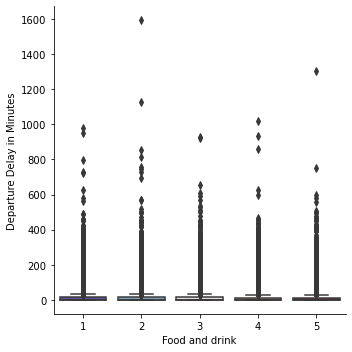

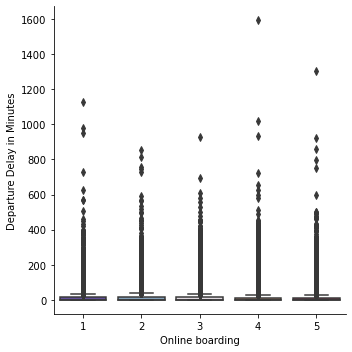

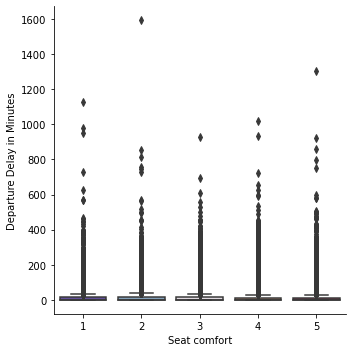

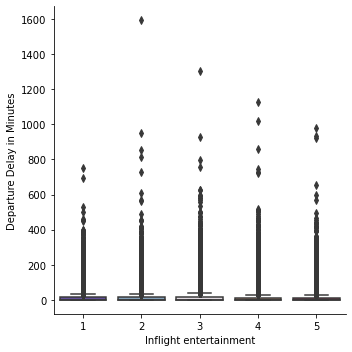

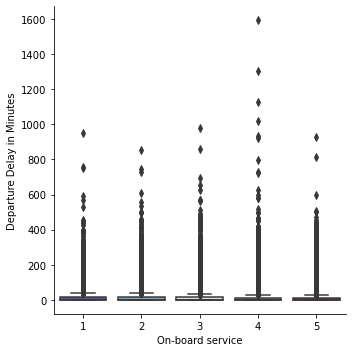

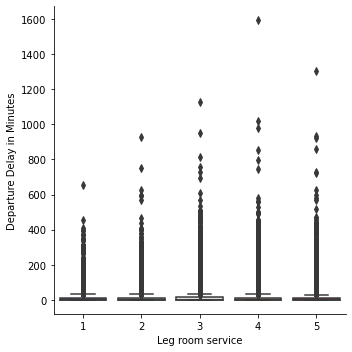

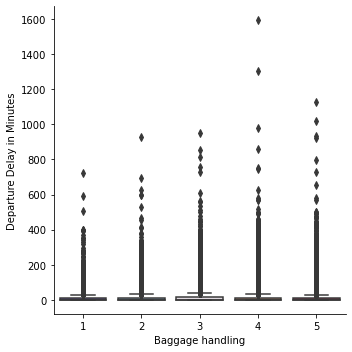

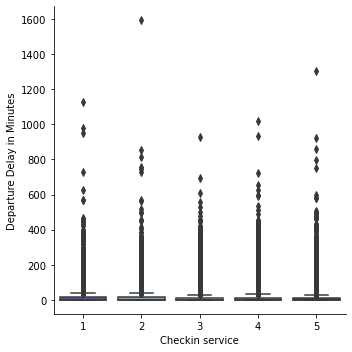

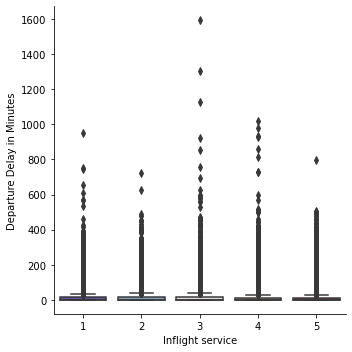

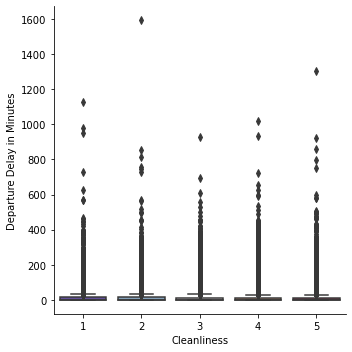

In [80]:
cols = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
for i, var in enumerate(cols):
#     fig, axes = plt.subplots(figsize=(16,20)) 
    sns.catplot(data=df, x=var, y='Departure Delay in Minutes',kind="box",ax = axes,palette="twilight_shifted")
plt.show()

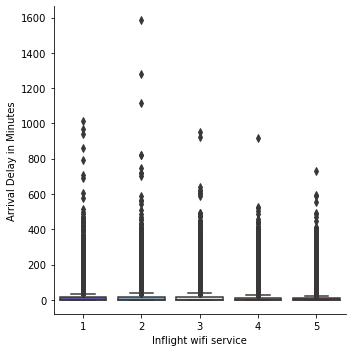

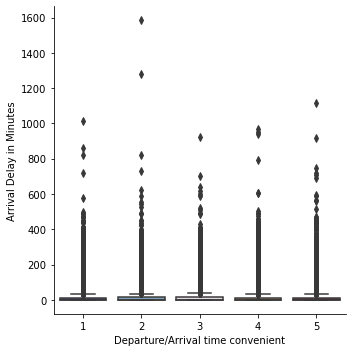

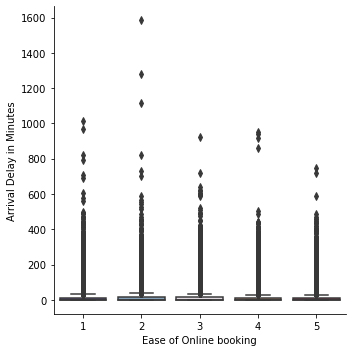

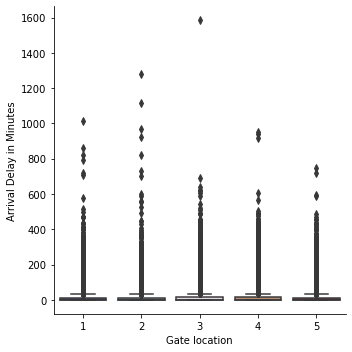

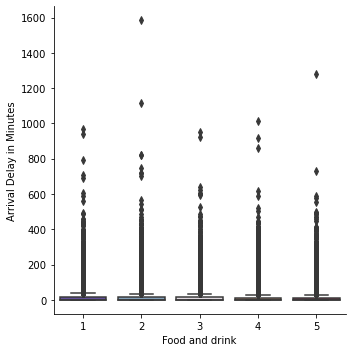

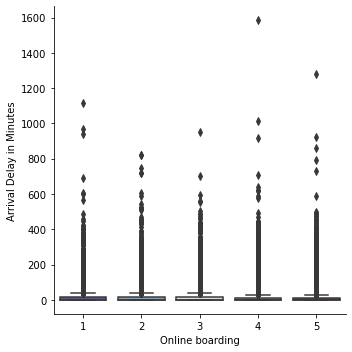

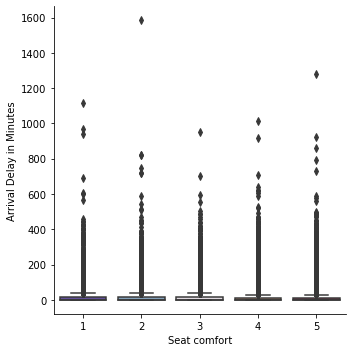

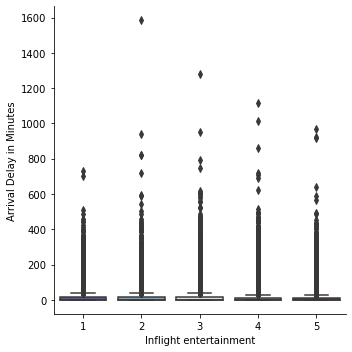

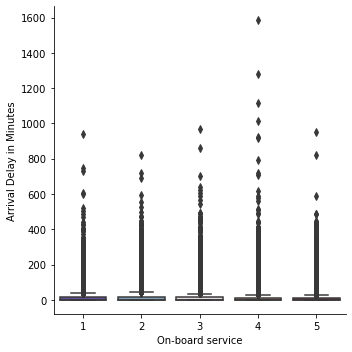

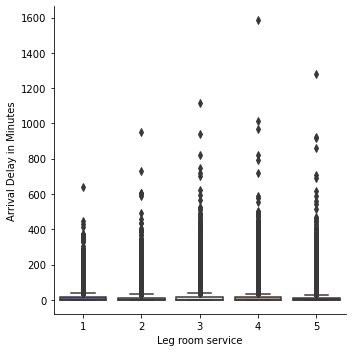

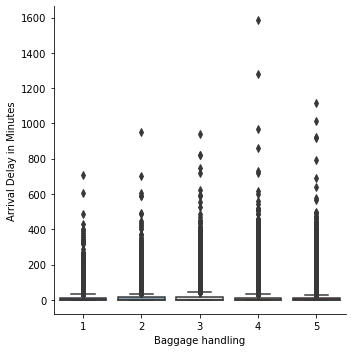

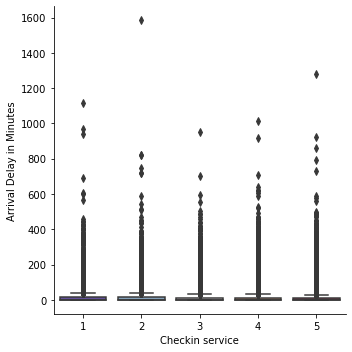

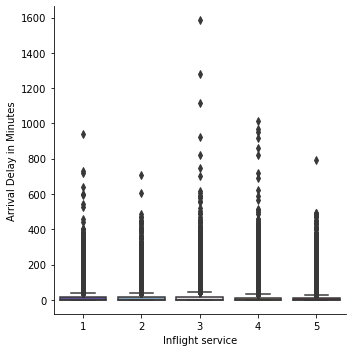

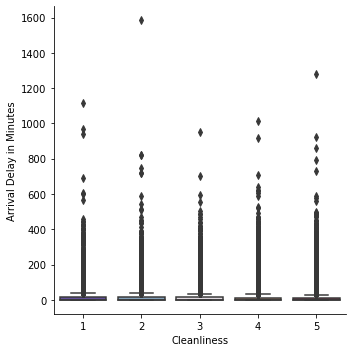

In [81]:

cols = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
for i, var in enumerate(cols):
#     fig, axes = plt.subplots(figsize=(16,20)) 
    sns.catplot(data=df, x=var, y='Arrival Delay in Minutes',kind="box",ax = axes,palette="twilight_shifted")
plt.show()

#### Multivariate Analysis

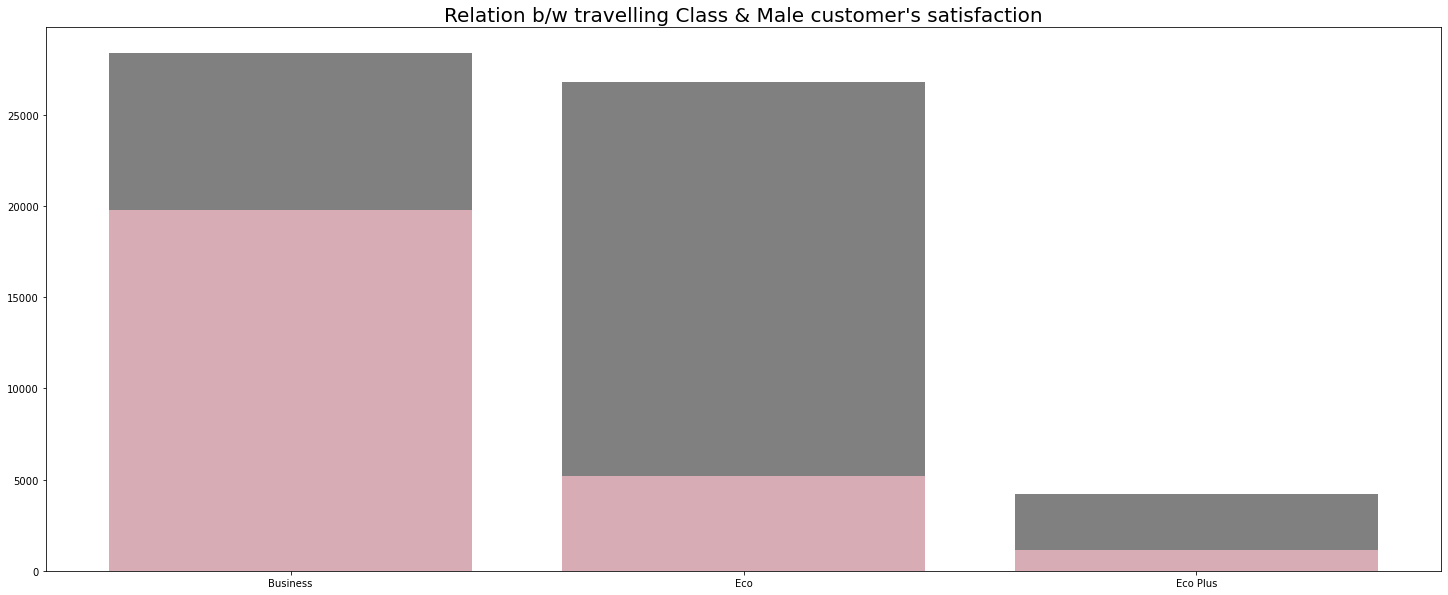

In [82]:
data = df
type_ = df['Class'].unique()
type_cat = []
type_priority = []
for var in type_:
    x = df['Class'][data['Gender']=='Male'][data['Class']==var].count()
    y = df['Class'][data['Gender']=='Male'][(data['Class']==var)&(data['satisfaction']=='yes')].count()
    type_cat.append(x)
    type_priority.append(y)
plt.figure(figsize=(25,10))
plt.bar(type_ , type_cat,color='grey')
plt.bar(type_ , type_priority,color='pink', alpha = 0.7)
plt.title("Relation b/w travelling Class & Male customer's satisfaction" , fontsize = 20)
plt.show()

#### Proportions of male & female satisfactions while travelling different classes 

In [83]:
for var in df['Class'].unique():
    satisfied = round(100*df[df['Gender']=='Male'][df['Class']==var][df['satisfaction'] == 'yes'].shape[0]/df[df['Gender']=='Male'][df['Class']==var].shape[0])
    printmd('**{}%** of Male customers are satisfied while travelling in **{}** class'.format(satisfied,var))

**70%** of Male customers are satisfied while travelling in **Business** class

**19%** of Male customers are satisfied while travelling in **Eco** class

**27%** of Male customers are satisfied while travelling in **Eco Plus** class

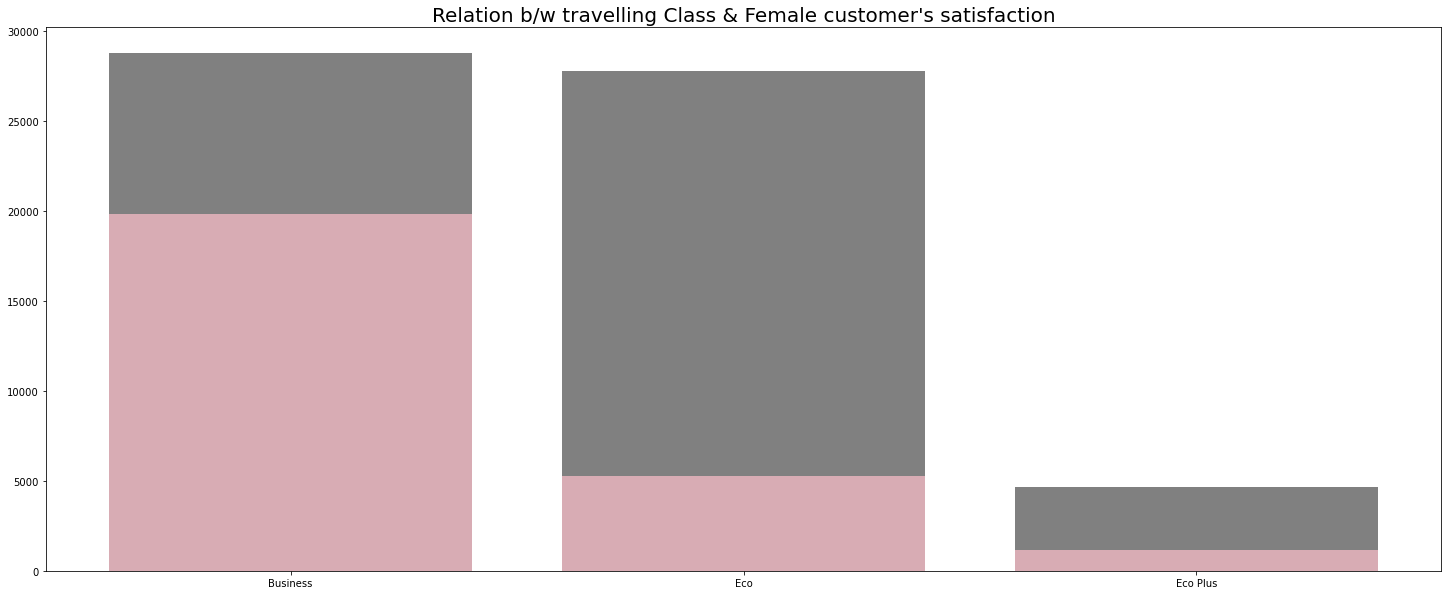

In [84]:
data = df
type_ = df['Class'].unique()
type_cat = []
type_priority = []
for var in type_:
    x = df['Class'][data['Gender']=='Female'][data['Class']==var].count()
    y = df['Class'][data['Gender']=='Female'][(data['Class']==var)&(data['satisfaction']=='yes')].count()
    type_cat.append(x)
    type_priority.append(y)
plt.figure(figsize=(25,10))
plt.bar(type_ , type_cat,color='grey')
plt.bar(type_ , type_priority,color='pink', alpha = 0.7)
plt.title("Relation b/w travelling Class & Female customer's satisfaction" , fontsize = 20)
plt.show()

In [85]:
for var in df['Class'].unique():
    satisfied = round(100*df[df['Gender']=='Female'][df['Class']==var][df['satisfaction'] == 'yes'].shape[0]/df[df['Gender']=='Female'][df['Class']==var].shape[0])
    printmd('**{}%** of Female customers are satisfied while travelling in **{}** class'.format(satisfied,var))

**69%** of Female customers are satisfied while travelling in **Business** class

**19%** of Female customers are satisfied while travelling in **Eco** class

**24%** of Female customers are satisfied while travelling in **Eco Plus** class

**Observations**: Be it male or female customers, majority of them satisfied only while travelling in the Business class. Customers seems dissatisfied in other class.

#### Average ratings of all the services

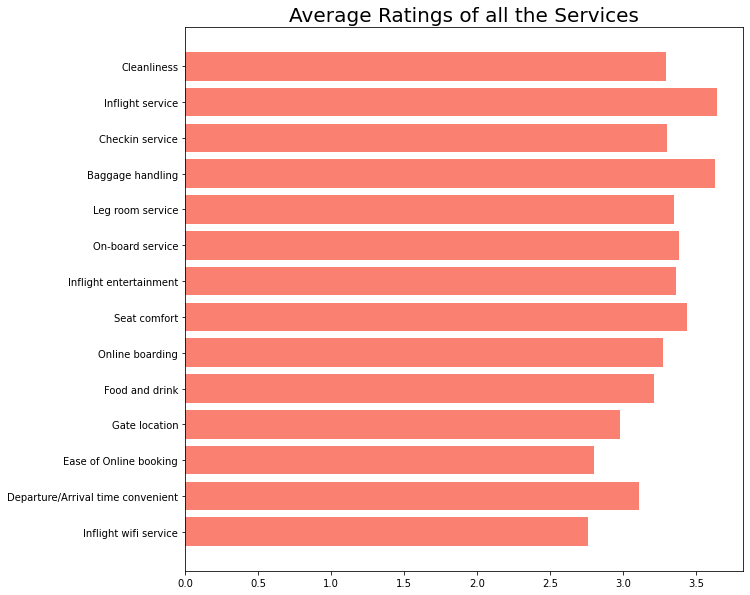

In [86]:
service_ = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location',
            'Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
            'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
average_rating = []
for var in service_:
    x = round(df[var].mean(),2)
    average_rating.append(x)

plt.figure(figsize=(10,10))
plt.barh(service_ , average_rating,color='salmon')
plt.title('Average Ratings of all the Services', fontsize = 20)
plt.show()

#### Average ratings of all the services given by the Female customers

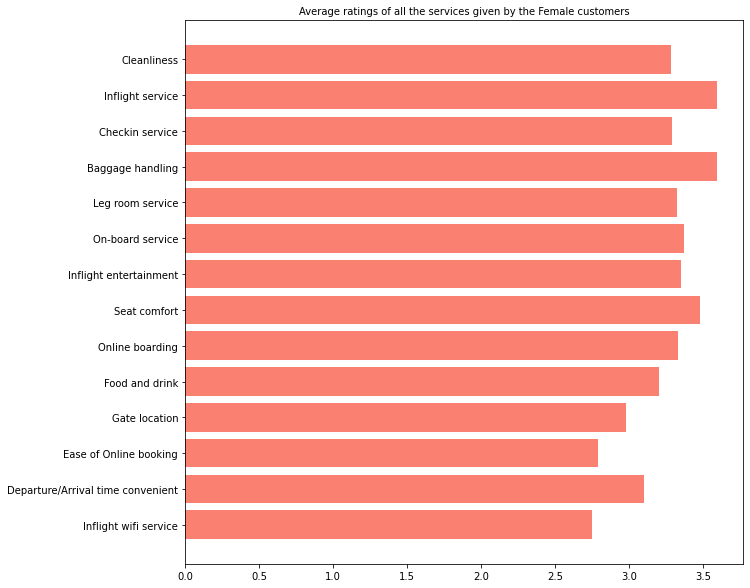

In [87]:
service_ = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location',
            'Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
            'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
average_rating = []
for var in service_:
    x = round(df[df['Gender']=='Female'][var].mean(),2)
    average_rating.append(x)

plt.figure(figsize=(10,10))
plt.barh(service_ , average_rating,color='salmon')
plt.title('Average ratings of all the services given by the Female customers', fontsize = 10)
plt.show()

#### Average ratings of all the services given by the Male customers

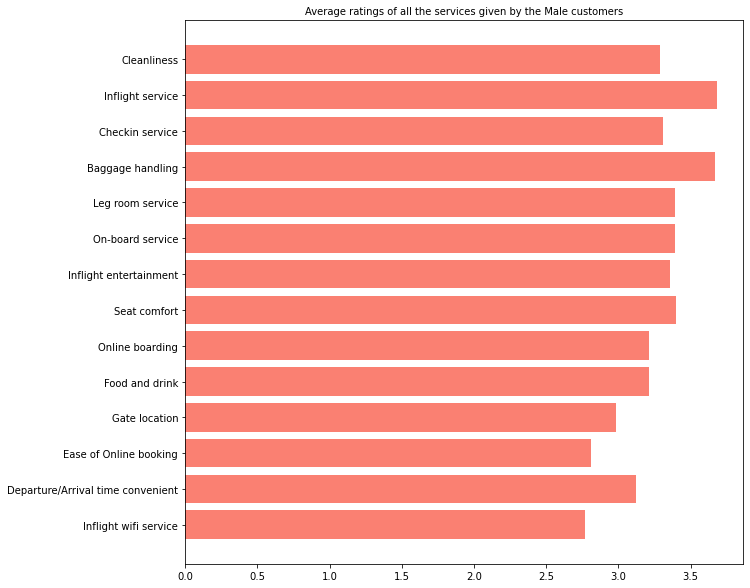

In [88]:
service_ = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location',
            'Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
            'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
average_rating = []
for var in service_:
    x = round(df[df['Gender']=='Male'][var].mean(),2)
    average_rating.append(x)

plt.figure(figsize=(10,10))
plt.barh(service_ , average_rating,color='salmon')
plt.title('Average ratings of all the services given by the Male customers', fontsize = 10)
plt.show()

**Observations**: Except Inflight Service & Baggage Handling, all the services got only an average ratings less than 3.5.

#### Comparision of Age Group & Route Category

In [89]:
#Since most of the customers are adults i.e. (21-64 years old) , so checking the percentage of adults prefer short,medium or long haul flights
for var in ['medium-haul', 'short-haul', 'long-haul']:
    x = ''
    if var == 'medium-haul':
        x = '(1500 km - 4100 km)'
    elif var == 'short-haul':
        x = '(less than 1500 km)'
    else:
        x = '(more than 4100 km)'
        
    yes_satisfaction = round(100.0*df[df['Route Category'] == var][df['Age Group']=='Adult'][df['satisfaction']=='yes'].shape[0]/df[df['Route Category'] == var][df['Age Group']=='Adult'].shape[0],2)
    printmd('**{}%** of Adult customers are satisfied while travelling through **{}** i.e **{}** route flight.'.format(yes_satisfaction,var,x))

**70.06%** of Adult customers are satisfied while travelling through **medium-haul** i.e **(1500 km - 4100 km)** route flight.

**37.36%** of Adult customers are satisfied while travelling through **short-haul** i.e **(less than 1500 km)** route flight.

**57.35%** of Adult customers are satisfied while travelling through **long-haul** i.e **(more than 4100 km)** route flight.

In [90]:
df.head()

Gender   Customer Type  Age   Type of Travel     Class  \
id                                                               
114960  Female  Loyal Customer   55  Business travel  Business   
43337     Male  Loyal Customer   36  Business travel       Eco   
74692   Female  Loyal Customer   17  Personal Travel       Eco   
98299   Female  Loyal Customer   11  Personal Travel       Eco   
70039     Male  Loyal Customer   39  Business travel       Eco   

        Flight Distance Age Group Route Category  Inflight wifi service  \
id                                                                        
114960             2001     Adult    medium-haul                      2   
43337               387     Adult     short-haul                      3   
74692              1235  Teenager     short-haul                      3   
98299              1072  Pre-teen     short-haul                      3   
70039               183     Adult     short-haul                      4   

        Departure/Arrival time convenient  ...  On-board service  \
id                                         ...                     
114960                                  2  ...                 4   
43337                                   5  ...                 1   
74692                                   4  ...                 3   
98299                                   2  ...                 2   
70039                                   3  ...                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
id                                                                              
114960                 4                 4                4                 4   
43337                  1                 1                2                 1   
74692                  5                 5                3                 4   
98299                  3                 3                2                 4   
70039                  2                 1                4                 4   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
id                                                                          
114960            3                          24                      21.0   
43337             3                           0                       1.0   
74692             4                           3                       0.0   
98299             1                           0                       0.0   
70039             4                           0                       0.0   

        satisfaction  Avg Satisfaction Rating  
id                                             
114960           yes                      3.0  
43337             no                      3.0  
74692             no                      4.0  
98299             no                      2.0  
70039            yes                      3.0  

[5 rows x 26 columns]

In [91]:
# Createing the new DataFrame
newdata = pd.get_dummies(df)
newdata.head()

Age  Flight Distance  Inflight wifi service  \
id                                                    
114960   55             2001                      2   
43337    36              387                      3   
74692    17             1235                      3   
98299    11             1072                      3   
70039    39              183                      4   

        Departure/Arrival time convenient  Ease of Online booking  \
id                                                                  
114960                                  2                       2   
43337                                   5                       2   
74692                                   4                       3   
98299                                   2                       4   
70039                                   3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
id                                                                     
114960              2               4                4             4   
43337               5               3                3             3   
74692               4               4                3             4   
98299               3               1                4             1   
70039               3               4                4             4   

        Inflight entertainment  ...  Age Group_Child  Age Group_Elderly  \
id                              ...                                       
114960                       4  ...                0                  0   
43337                        3  ...                0                  0   
74692                        4  ...                0                  0   
98299                        1  ...                0                  0   
70039                        4  ...                0                  0   

        Age Group_Pre-teen  Age Group_Teenager  Age Group_Young Adult  \
id                                                                      
114960                   0                   0                      0   
43337                    0                   0                      0   
74692                    0                   1                      0   
98299                    1                   0                      0   
70039                    0                   0                      0   

        Route Category_long-haul  Route Category_medium-haul  \
id                                                             
114960                         0                           1   
43337                          0                           0   
74692                          0                           0   
98299                          0                           0   
70039                          0                           0   

        Route Category_short-haul  satisfaction_no  satisfaction_yes  
id                                                                    
114960                          0                0                 1  
43337                           1                1                 0  
74692                           1                1                 0  
98299                           1                1                 0  
70039                           1                0                 1  

[5 rows x 39 columns]

In [92]:
df_corr = newdata.corr() # Performing Corelation 

In [93]:
yes_sat = df_corr['satisfaction_yes'].sort_values(ascending = False)
round(yes_sat,2)

satisfaction_yes                     1.00
Online boarding                      0.52
Class_Business                       0.50
Avg Satisfaction Rating              0.46
Type of Travel_Business travel       0.45
Inflight entertainment               0.40
Seat comfort                         0.34
Inflight wifi service                0.32
On-board service                     0.32
Leg room service                     0.31
Cleanliness                          0.31
Route Category_medium-haul           0.30
Flight Distance                      0.30
Baggage handling                     0.24
Inflight service                     0.24
Checkin service                      0.23
Food and drink                       0.21
Age Group_Adult                      0.21
Ease of Online booking               0.19
Customer Type_Loyal Customer         0.19
Age                                  0.13
Gender_Male                          0.01
Route Category_long-haul             0.01
Gate location                     

The **yes satisfaction** variable is **highly co-related positively** with the following variables:

    Online boarding                      0.50
    Class_Business                       0.50
    Avg Satisfaction Rating              0.45
    Type of Travel_Business travel       0.45
    Inflight entertainment               0.40
    Seat comfort                         0.35
    On-board service                     0.32
    Leg room service                     0.31
    Cleanliness                          0.31
    Route Category_medium-haul           0.30
    Flight Distance                      0.30

The **yes satisfaction** variable is **highly co-related negatively** with the following variables:

    Route Category_short-haul           -0.30
    Class_Eco                           -0.44
    Type of Travel_Personal Travel      -0.45


In [94]:
no_sat = df_corr['satisfaction_no'].sort_values(ascending = False)
round(no_sat,2)

satisfaction_no                      1.00
Type of Travel_Personal Travel       0.45
Class_Eco                            0.44
Route Category_short-haul            0.30
Customer Type_disloyal Customer      0.19
Age Group_Elderly                    0.11
Age Group_Teenager                   0.11
Class_Eco Plus                       0.10
Age Group_Child                      0.09
Age Group_Pre-teen                   0.08
Arrival Delay in Minutes             0.06
Departure/Arrival time convenient    0.05
Departure Delay in Minutes           0.05
Age Group_Young Adult                0.03
Gender_Female                        0.01
Gate location                        0.00
Route Category_long-haul            -0.01
Gender_Male                         -0.01
Age                                 -0.13
Customer Type_Loyal Customer        -0.19
Ease of Online booking              -0.19
Age Group_Adult                     -0.21
Food and drink                      -0.21
Checkin service                   

The **no satisfaction** variable is **highly co-related positively** with the following variables:

    Type of Travel_Personal Travel       0.45
    Class_Eco                            0.44
    Route Category_short-haul            0.30

The **no satisfaction variable** is **highly co-related positively** with the following variables:

    Flight Distance                     -0.30
    Route Category_medium-haul          -0.30
    Cleanliness                         -0.31
    Leg room service                    -0.31
    On-board service                    -0.32
    Seat comfort                        -0.35
    Inflight entertainment              -0.40
    Type of Travel_Business travel      -0.45
    Avg Satisfaction Rating             -0.45
    Class_Business                      -0.50
    Online boarding                     -0.50   

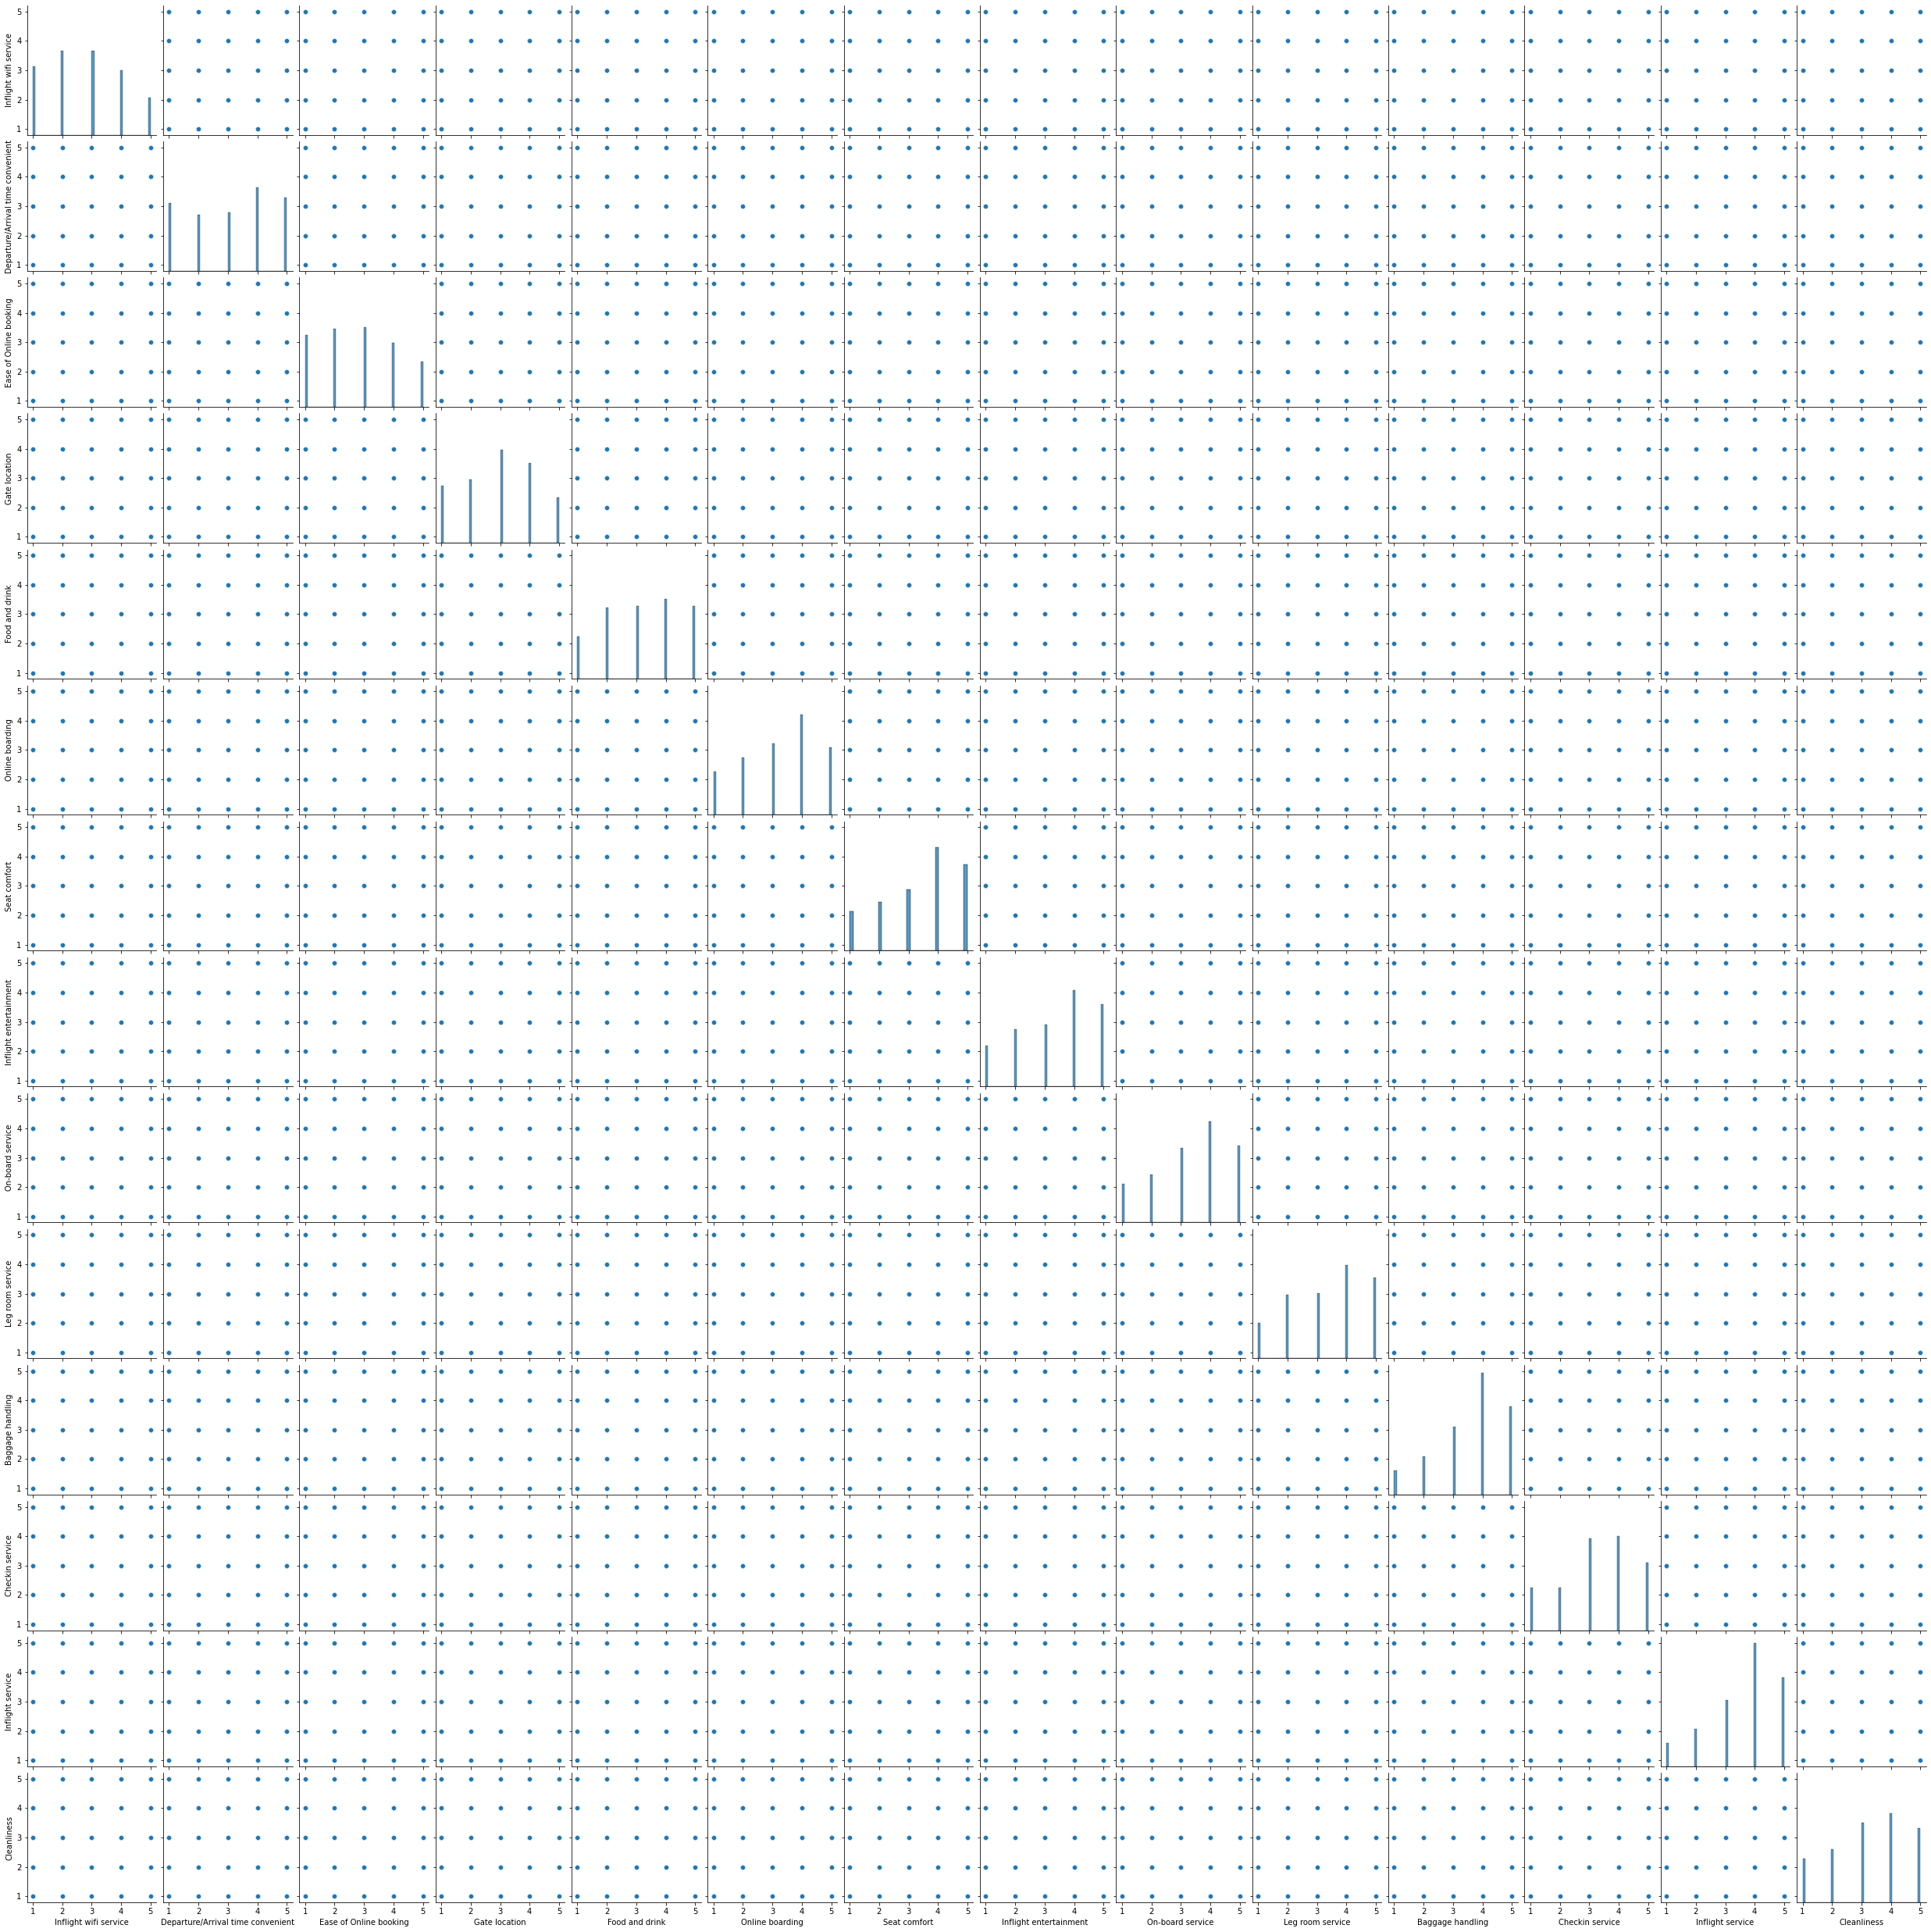

In [95]:
sns.pairplot(df[discrete_num])

**Observation**: No patterns has been found.

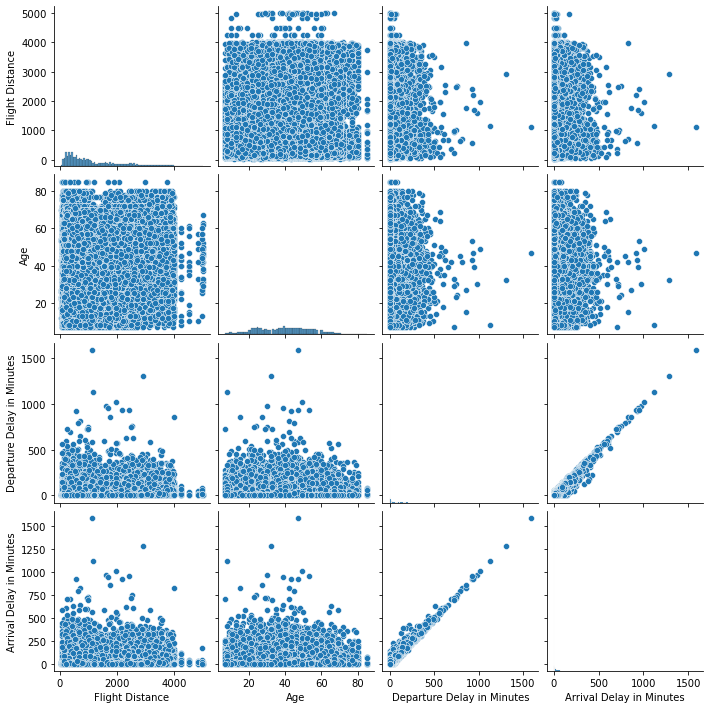

In [96]:
sns.pairplot(df[continuous_num])

**Observation**: 
    
-- In the **Age vs Flight Distance**, it can be stated that, datapoints having **Age > 80** and **Flight Distance > 4000** are the outliers.

-- In the **Departure Delay in Minutes vs Arrival Delay in Minutes**, data has **linear** relationship.

-- Other than this, no patterns has been found.

<AxesSubplot:>

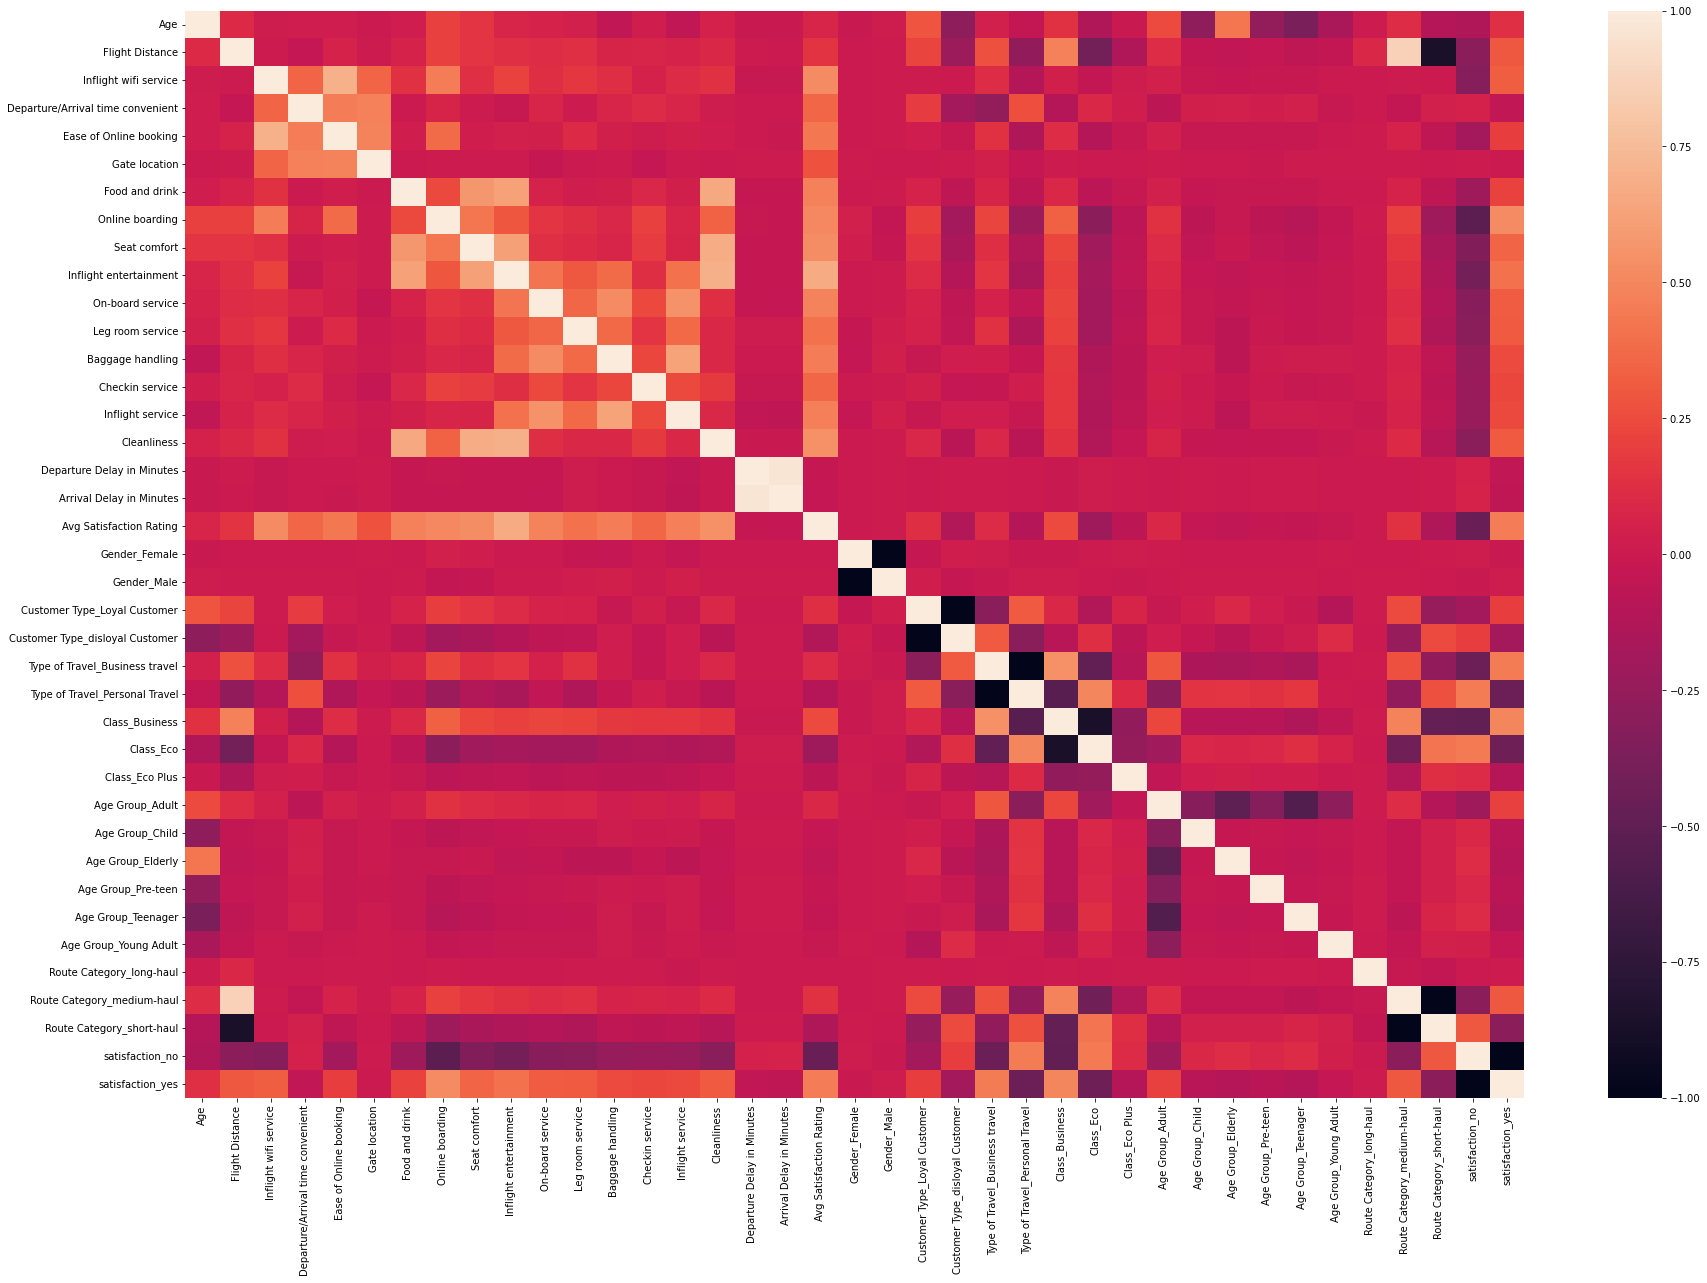

In [97]:
plt.figure(figsize = (30,20))
sns.heatmap(df_corr)

### Model and Prediction

In [98]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cat_col = df.select_dtypes(include = 'object').columns
for i in cat_col:
    df[i] = LE.fit_transform(df[i])

In [99]:
X = df.drop(['satisfaction'], axis = 1)
y = df['satisfaction']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
y_pred = rfc.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test,y_pred)

0.9514243872786052

In [104]:
confusion_matrix(y_test,y_pred)

array([[20055,   451],
       [ 1307, 14378]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.94      0.98      0.96     20506
     class 2       0.97      0.92      0.94     15685

    accuracy                           0.95     36191
   macro avg       0.95      0.95      0.95     36191
weighted avg       0.95      0.95      0.95     36191



In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred1 = dtc.predict(X_test)

In [108]:
accuracy_score(y_pred1,y_test)

0.9252300295653616

In [109]:
confusion_matrix(y_test,y_pred1)

array([[19066,  1440],
       [ 1266, 14419]], dtype=int64)

In [110]:
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.94      0.93      0.93     20506
     class 2       0.91      0.92      0.91     15685

    accuracy                           0.93     36191
   macro avg       0.92      0.92      0.92     36191
weighted avg       0.93      0.93      0.93     36191



In [111]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred2 = my_model.predict(X_test)

# Accuracy of model
print('Accuracy:',accuracy_score(y_pred2,y_test),'\n')

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred2))

#Making Classification report
print(classification_report(y_test, y_pred2, target_names=target_names))

Accuracy: 0.952225691470255 

[[20014   492]
 [ 1237 14448]]
              precision    recall  f1-score   support

     class 1       0.94      0.98      0.96     20506
     class 2       0.97      0.92      0.94     15685

    accuracy                           0.95     36191
   macro avg       0.95      0.95      0.95     36191
weighted avg       0.95      0.95      0.95     36191



In [112]:
t_stop = time.process_time()
print("Elapsed time during the whole program in seconds:",t_stop-t_start) 

Elapsed time during the whole program in seconds: 343.140625


### Summary:

1. In all the services, customers are mostly dissatisfied with Inflight wifi service and Ease of Online booking services.

2. In general, majority of the customers are Adult (21-64 yrs old), travels in Eco Plus class, prefer to travel medium-haul flights (1500-4100 km). 

3. No. of Female travellers are more than Male. 

4. Customers are more satisfied while traveling in Business class & least satisfied with Eco class.

5. When the arrival & departure is delayed, customers having age less than 30 and greater than 60 are mostly unsatisfied.

6. There are more no. of Satisfied customers than the Unsatisfied ones throughout the given data.

7. Considering newdata DataFrame, Online boarding is having highest co-relation when compared with satisfaction_yes positively,while negatively with satisfaction_no.


#### Submission By:
## Zashank Khare

###                                                              Thanks & Happy Learning

In [126]:
list1 = np.array([1,2,3,4,5,6,7])
list2 = [(lambda x :pow(x,2))(x) for x in list1]
list2
print([(lambda x :pow(x,2))(x) for x in list1])


[1, 4, 9, 16, 25, 36, 49]


In [115]:
def sqr(x):
    return x*x

for i in list1:
    print(sqr(i))

1
4
9
16
25
36
49


In [121]:
[(lambda x: x*x) (x) for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [119]:
[(lambda x: x*x)(x) for x in [1,2,3,4,5,6,7]]

[1, 4, 9, 16, 25, 36, 49]